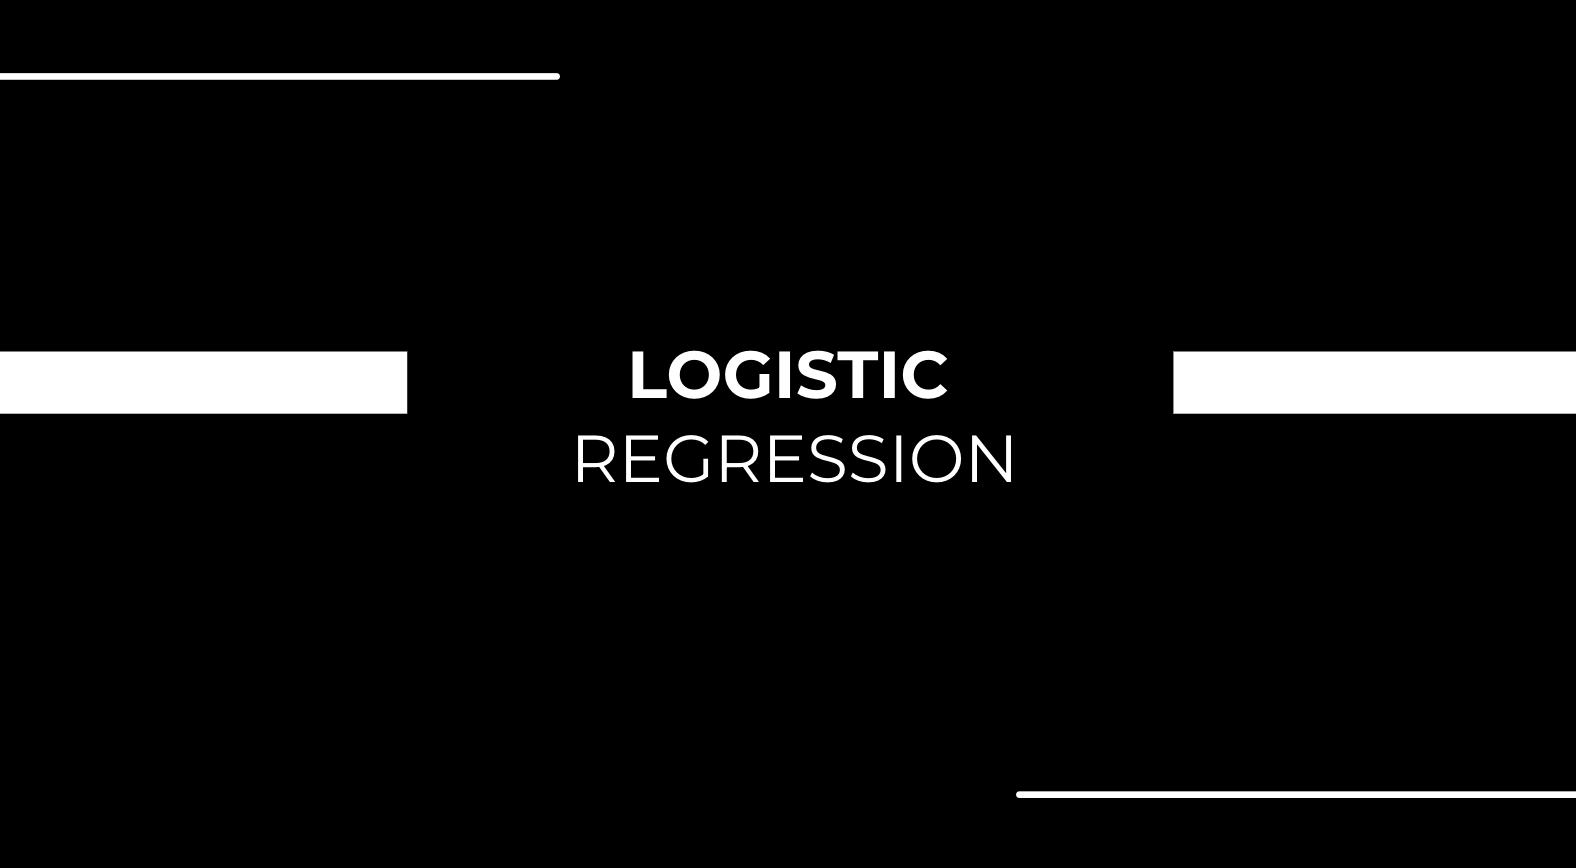

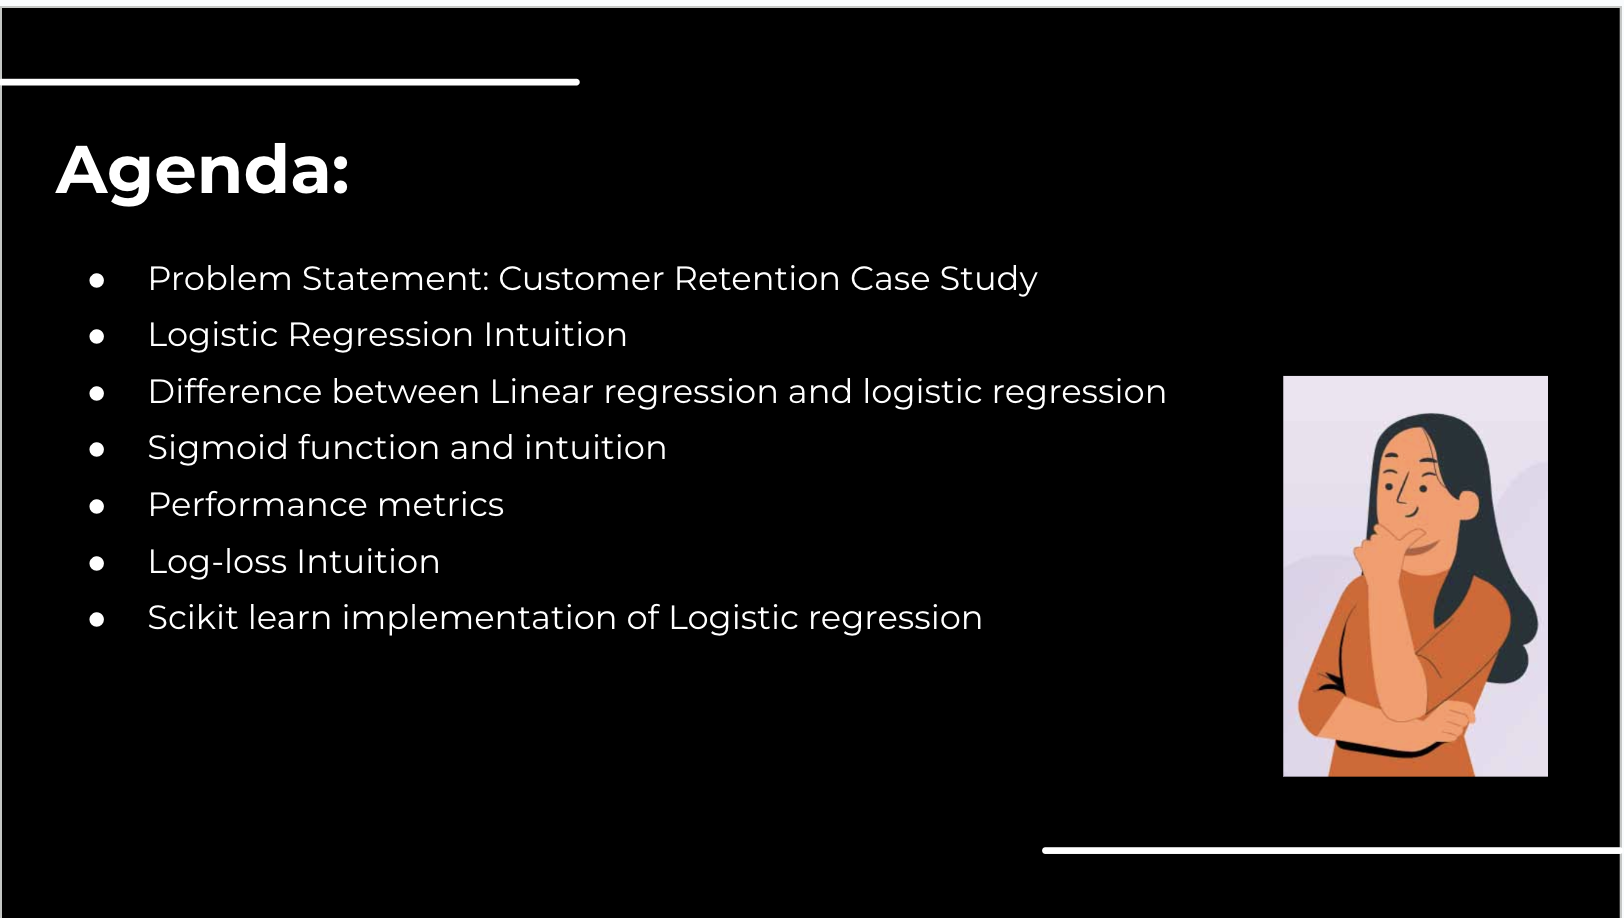

##Introduction to Business Case: Predicting customer retention in the banking sector

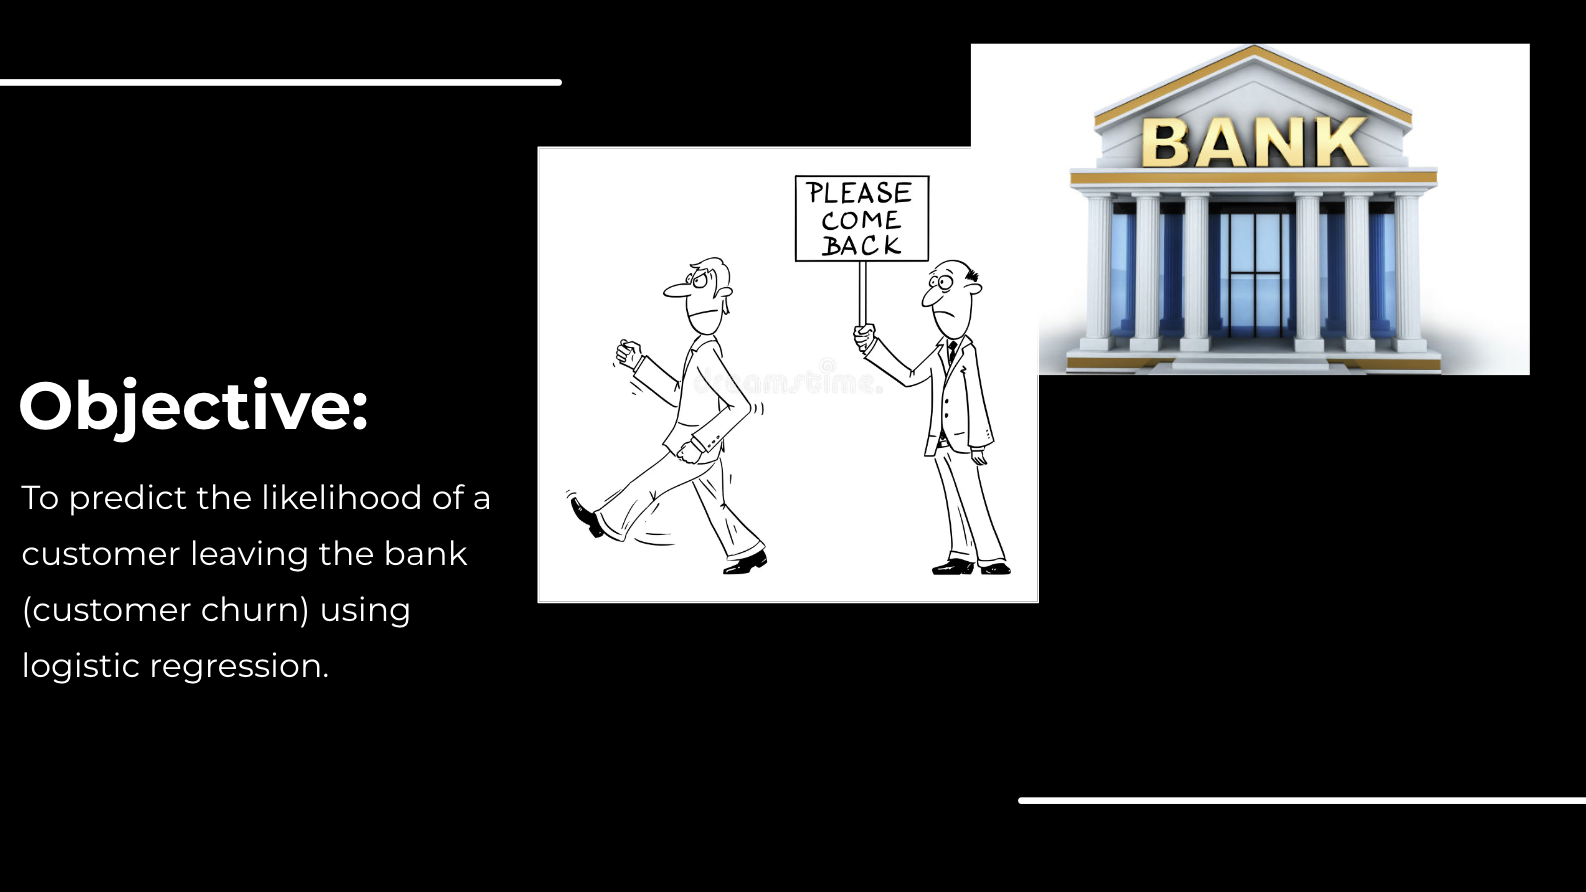

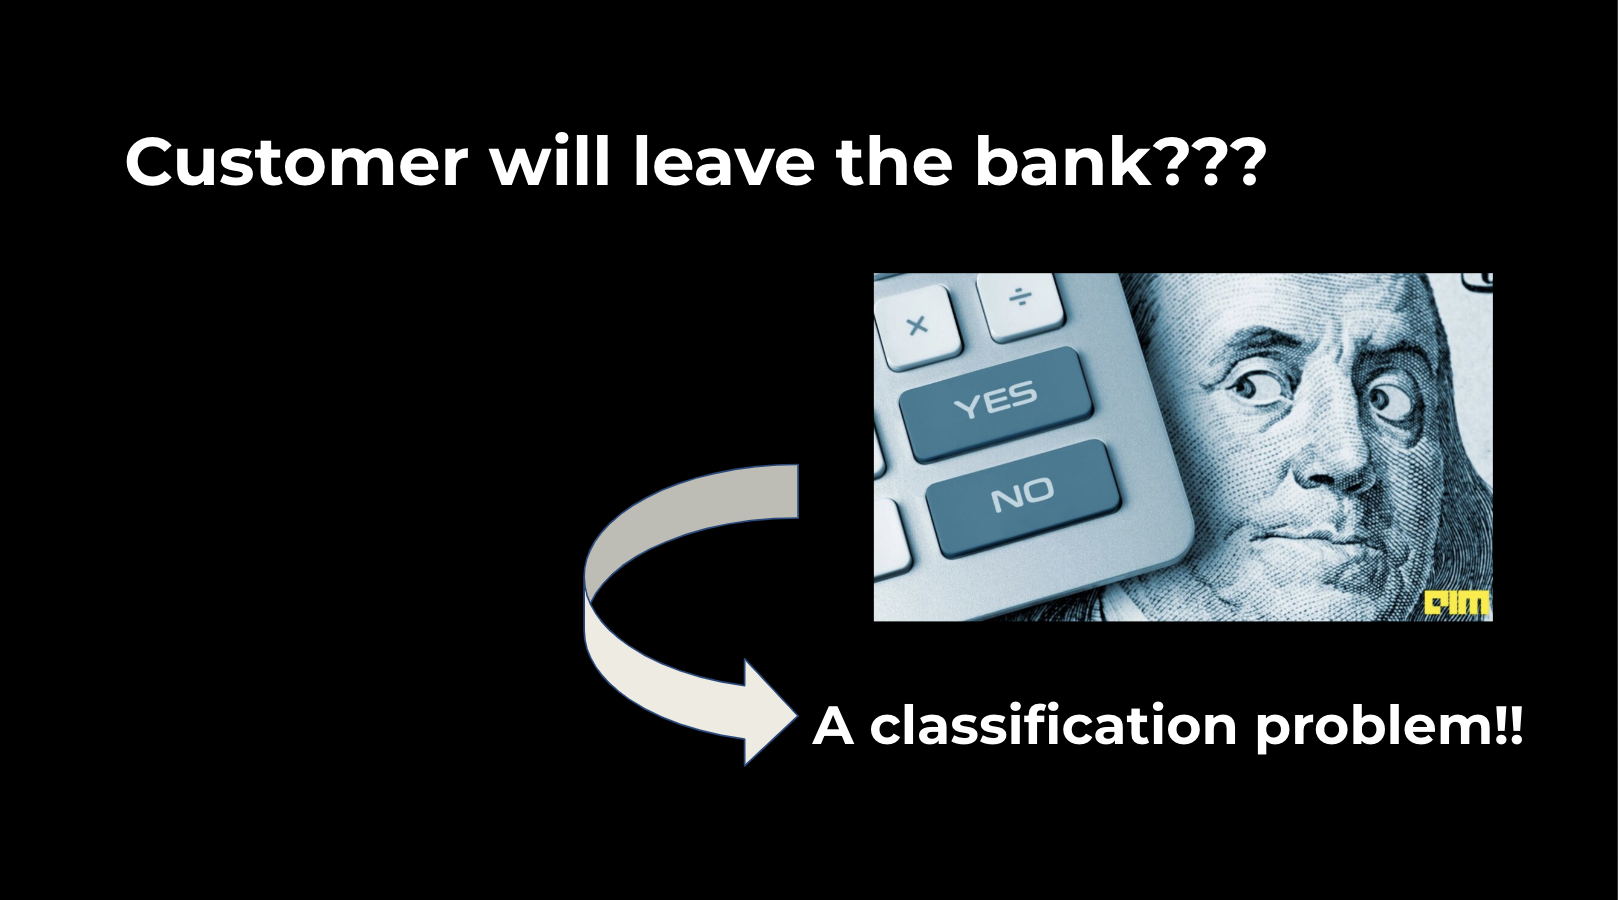

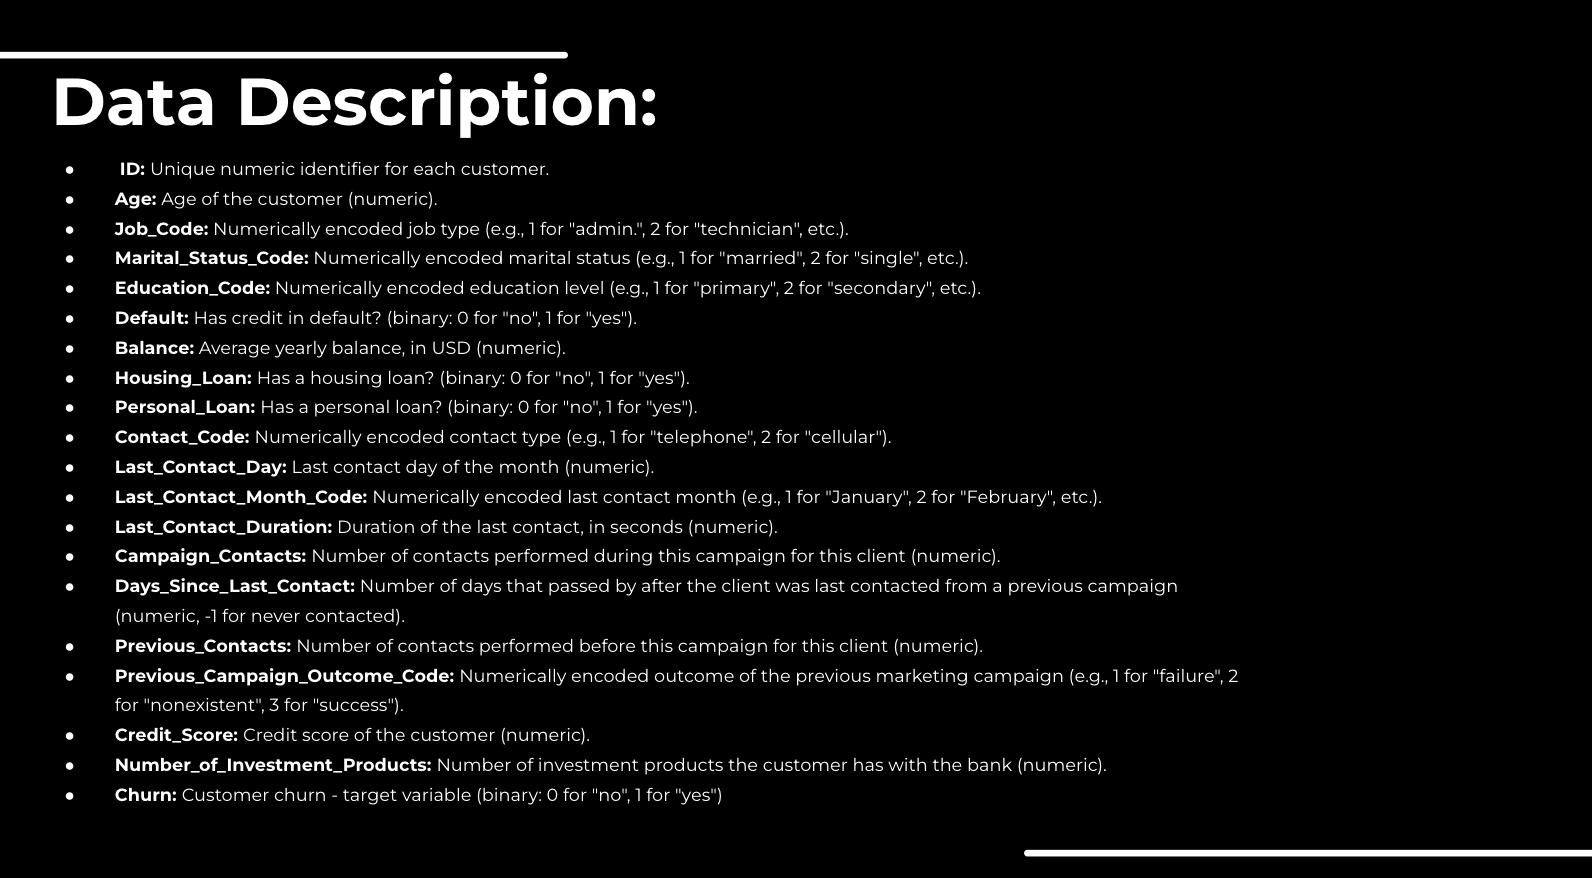

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!gdown 11sOMi2DfxDcbRa64MPe5Tg5iZ45_mohi


Downloading...
From: https://drive.google.com/uc?id=11sOMi2DfxDcbRa64MPe5Tg5iZ45_mohi
To: /content/Bank_customer_retention.csv
100% 494k/494k [00:00<00:00, 76.5MB/s]


In [ ]:
import pandas as pd
churn = pd.read_csv("Bank_customer_retention.csv")
churn.head()

ID  Age  Credit_Score  Marital_Status_Code  Education_Code  Default  \
0  128   25         265.1                197.4           244.7     10.0   
1  107   26         161.6                195.5           254.4     13.7   
2  137    0         243.4                121.2           162.6     12.2   
3   84    0         299.4                 61.9           196.9      6.6   
4   75    0         166.7                148.3           186.9     10.1   

   Days_Since_Last_Contact  Housing_Loan  Personal_Loan  Last_Contact_Day  \
0                        1             0              1               110   
1                        1             0              1               123   
2                        0             0              0               114   
3                        2             1              0                71   
4                        3             1              0               113   

   ...  Last_Contact_Duration  Contact_Code  Balance  Campaign_Contacts  \
0  ...                     99         16.78       91              11.01   
1  ...                    103         16.62      103              11.45   
2  ...                    110         10.30      104               7.32   
3  ...                     88          5.26       89               8.86   
4  ...                    122         12.61      121               8.41   

   Previous_Contacts  Previous_Campaign_Outcome_Code  Job_Code Area_Code  \
0                  3                            2.70        KS       415   
1                  3                            3.70        OH       415   
2                  5                            3.29        NJ       415   
3                  7                            1.78        OH       408   
4                  3                            2.73        OK       415   

    Number_of_Investment_Products Churn  
0                        382-4657     0  
1                        371-7191     0  
2                        358-1921     0  
3                        375-9999     0  
4                        330-6626     0  

[5 rows x 21 columns]

## Logistic Regression v/s Linear Regression

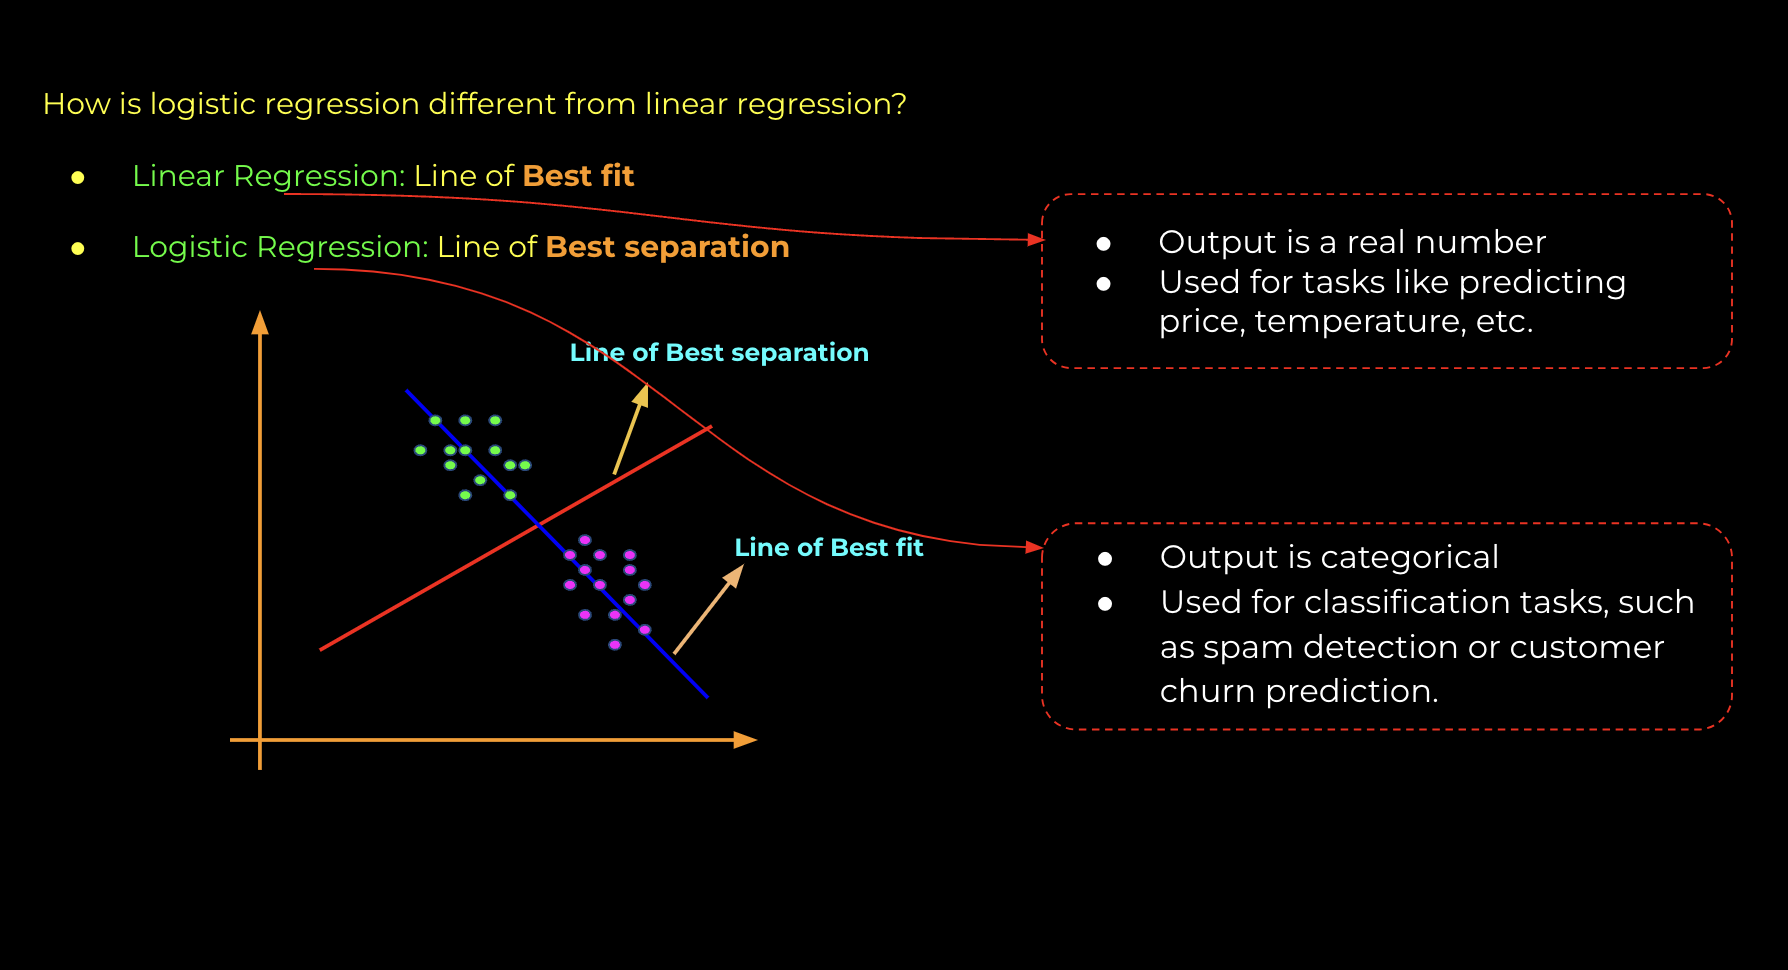

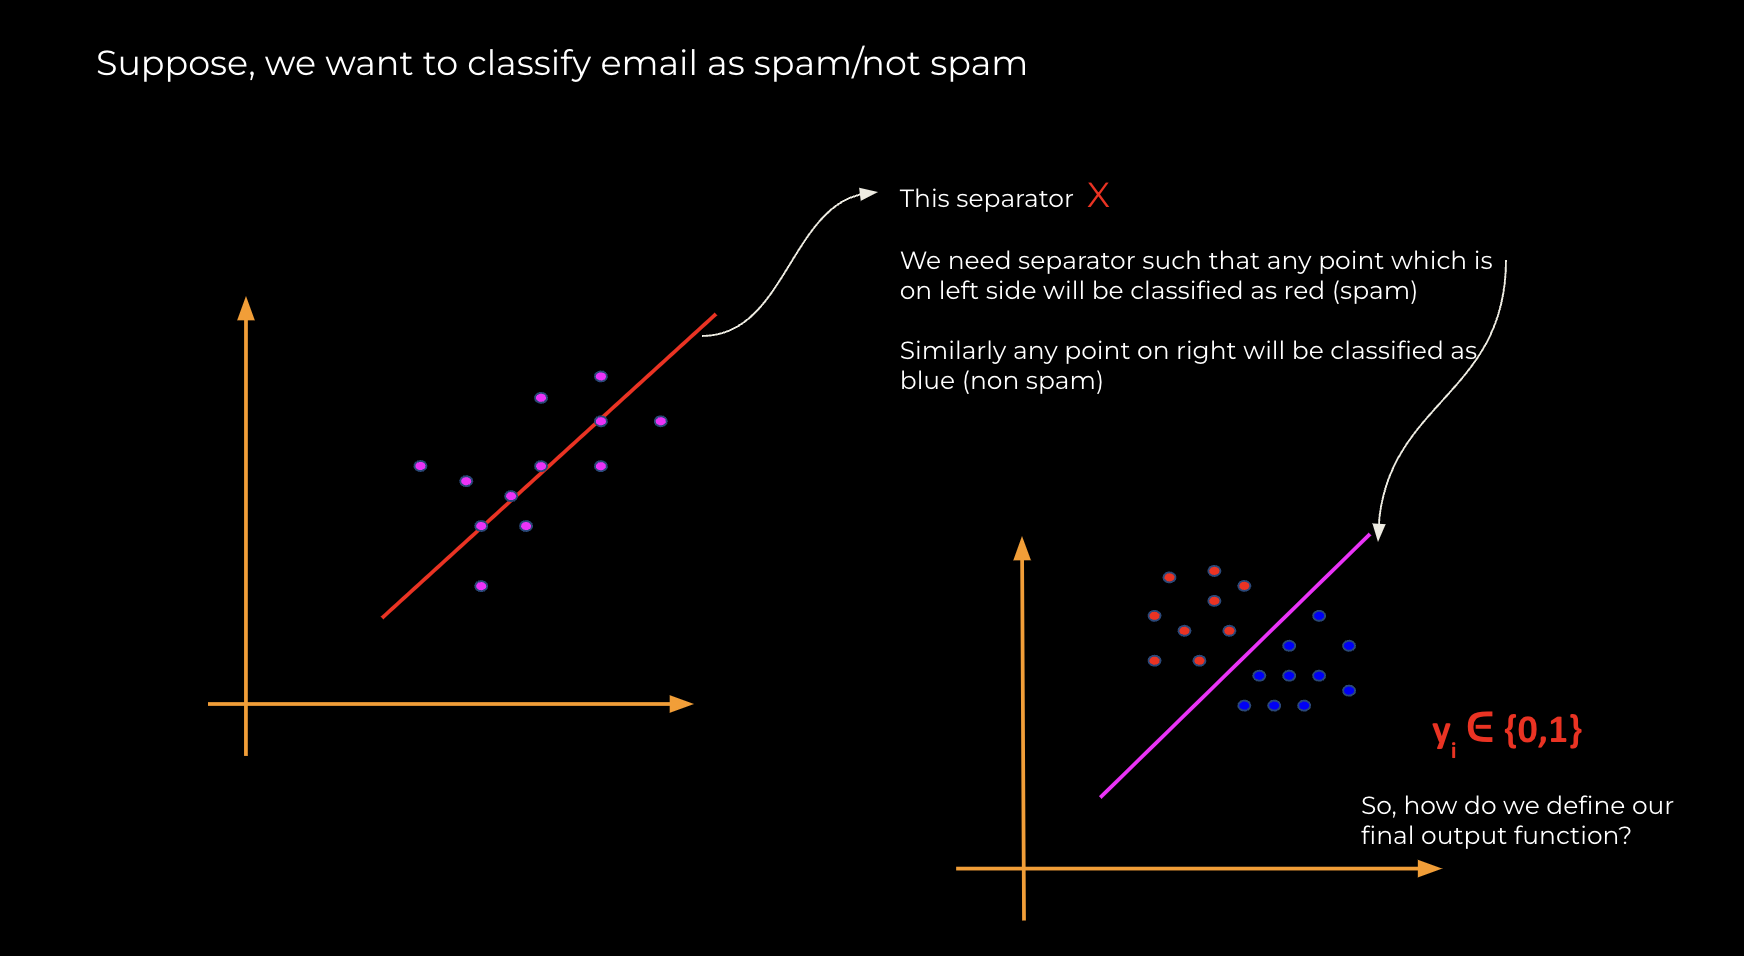

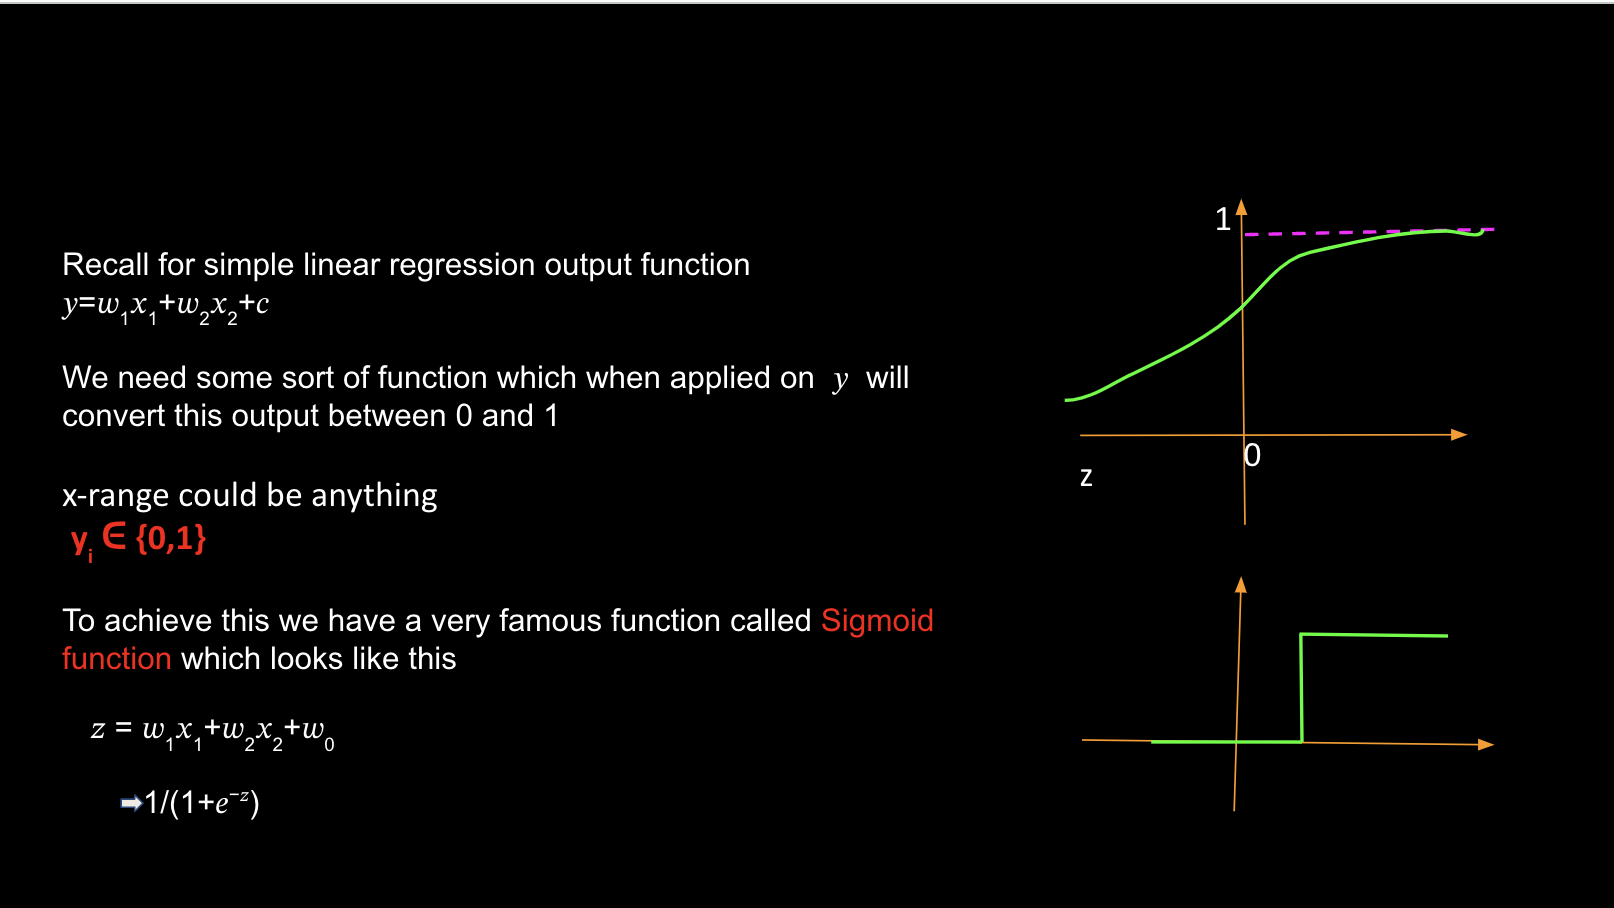

## Geometric Intution


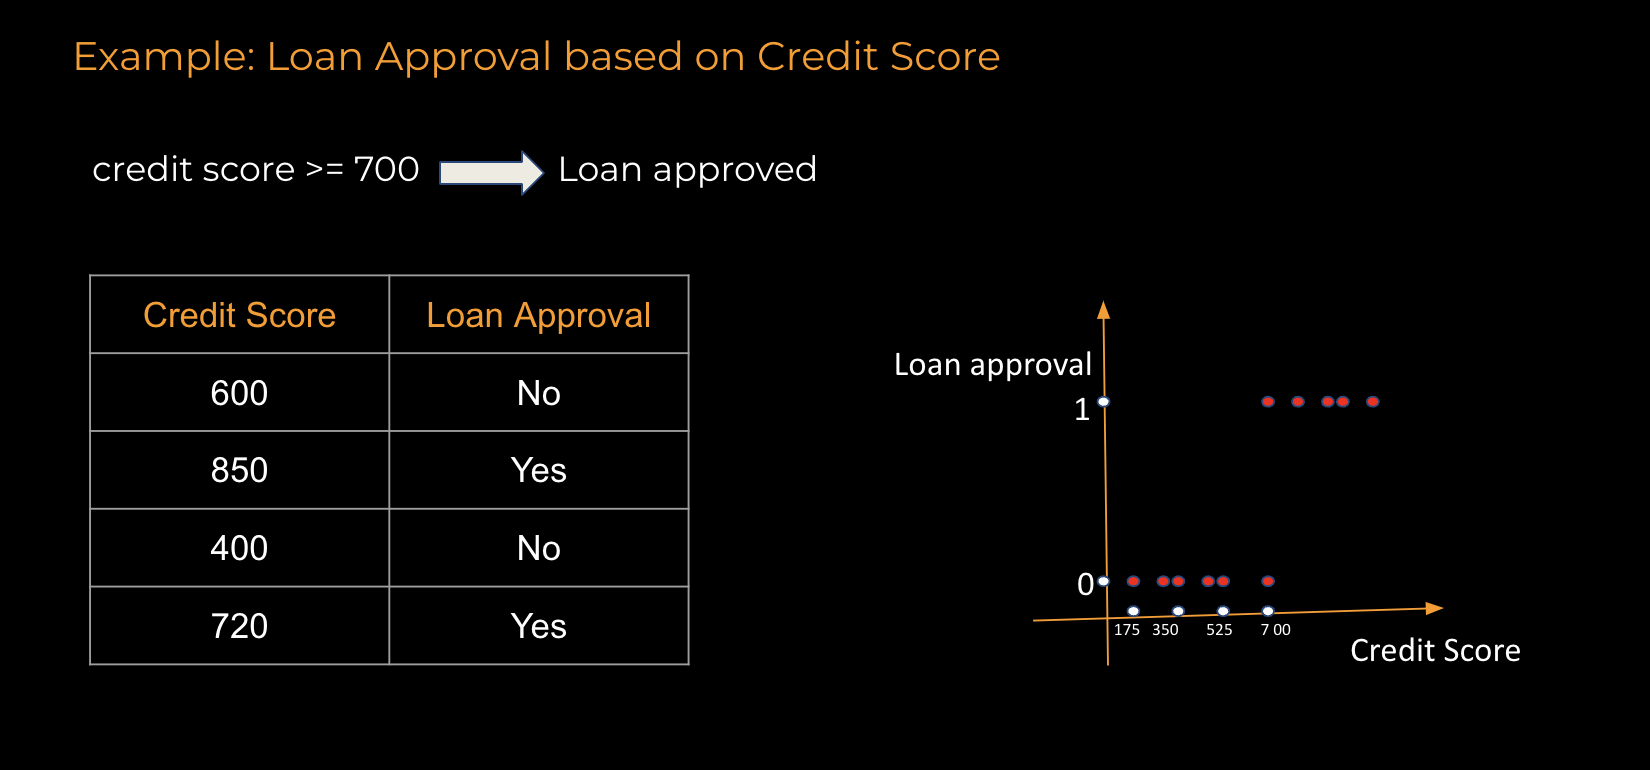

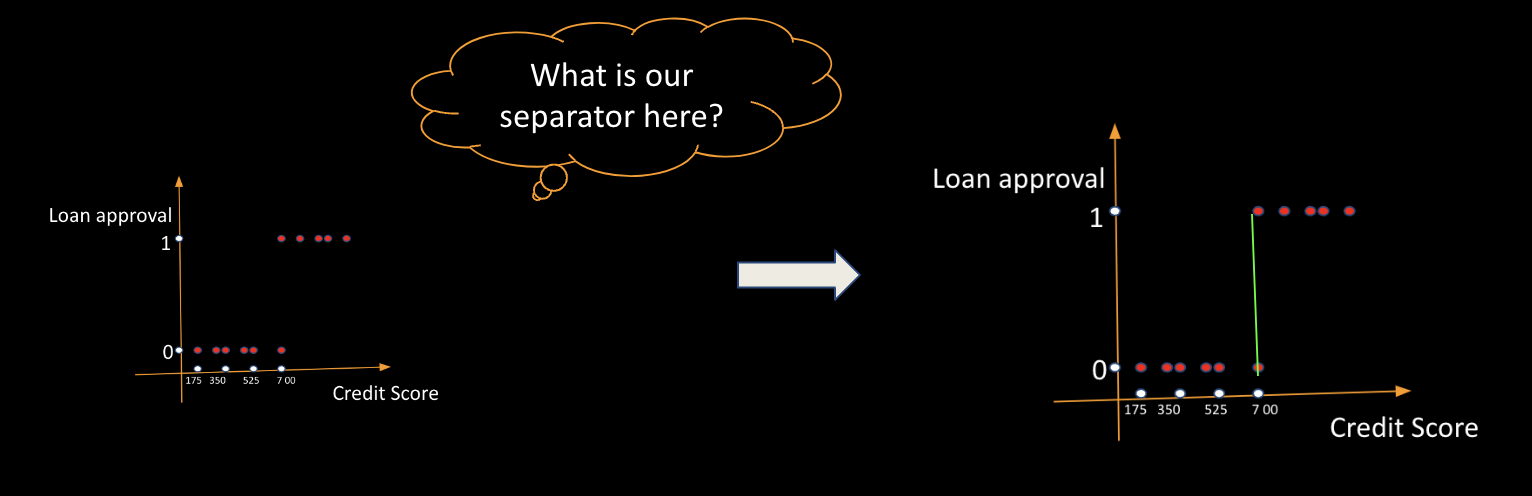

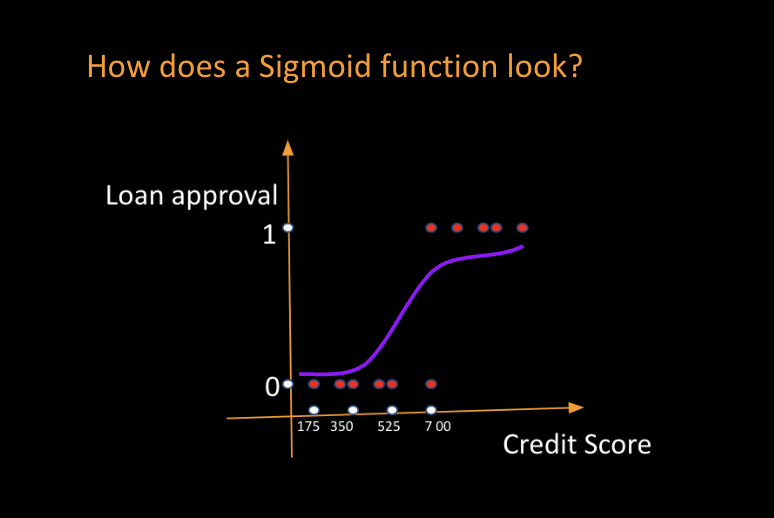

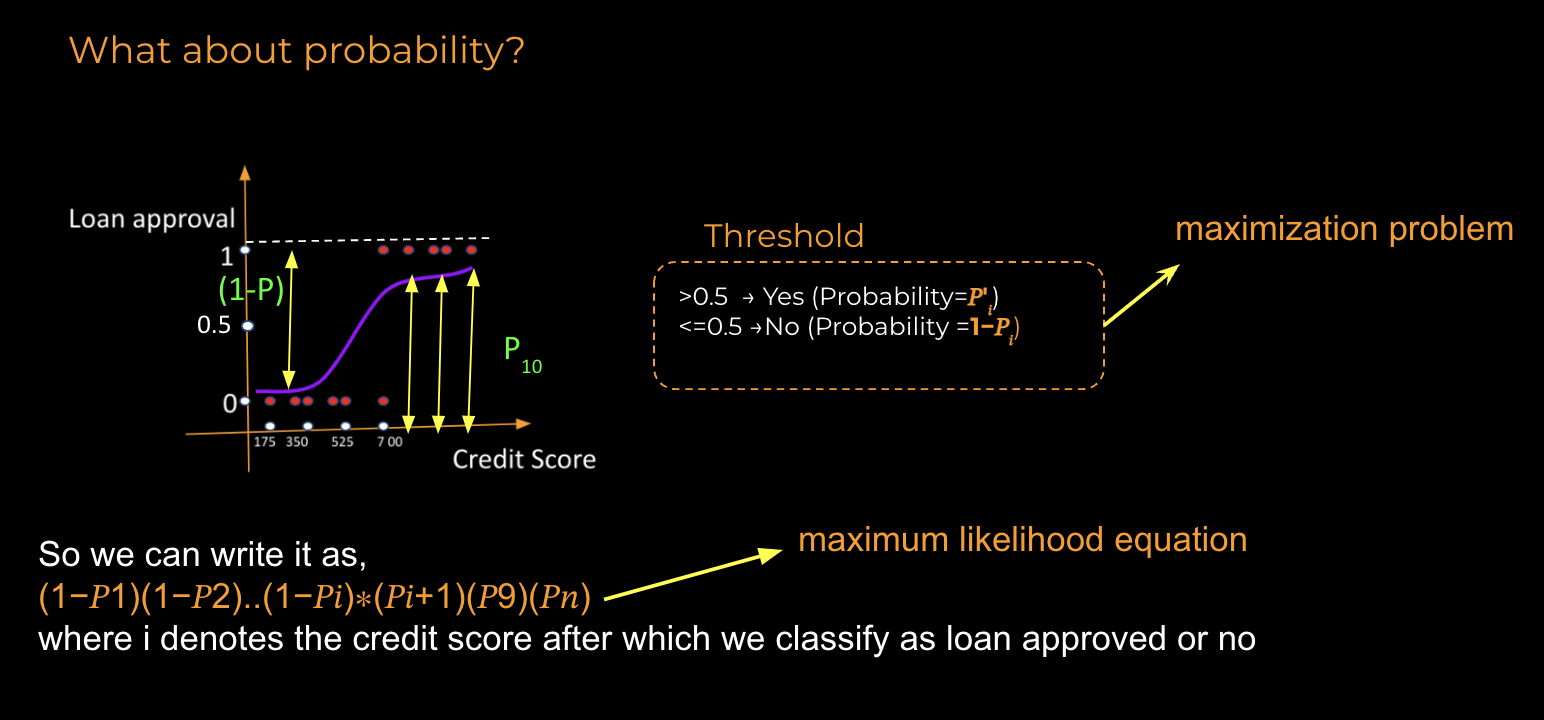

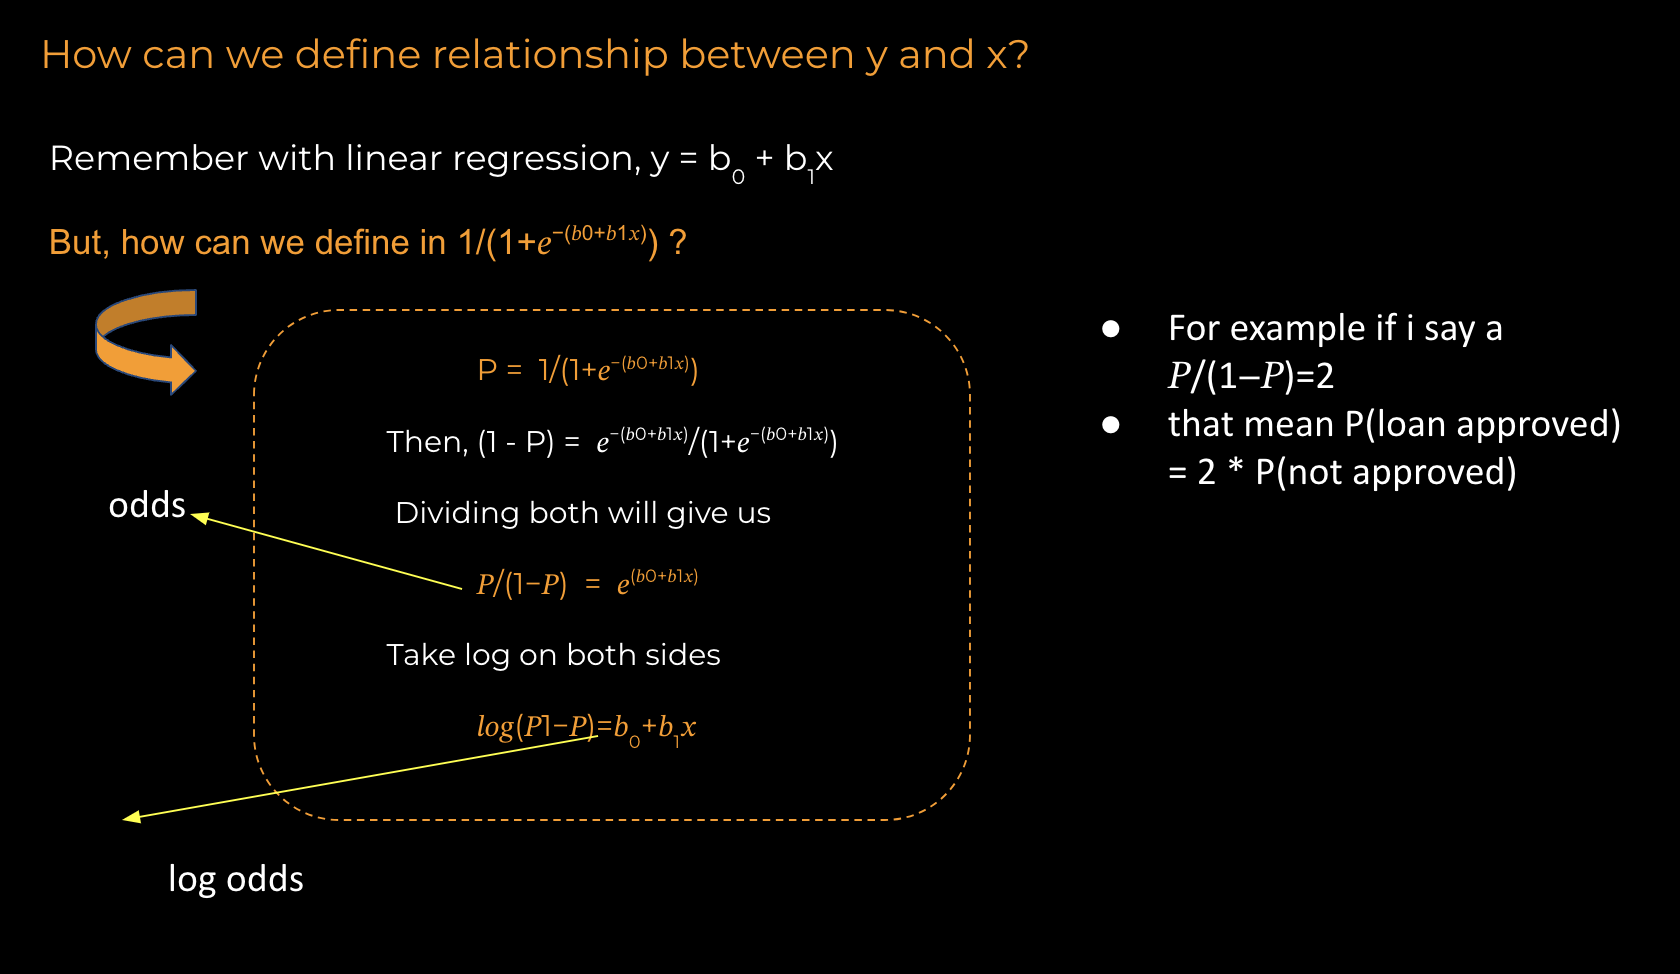

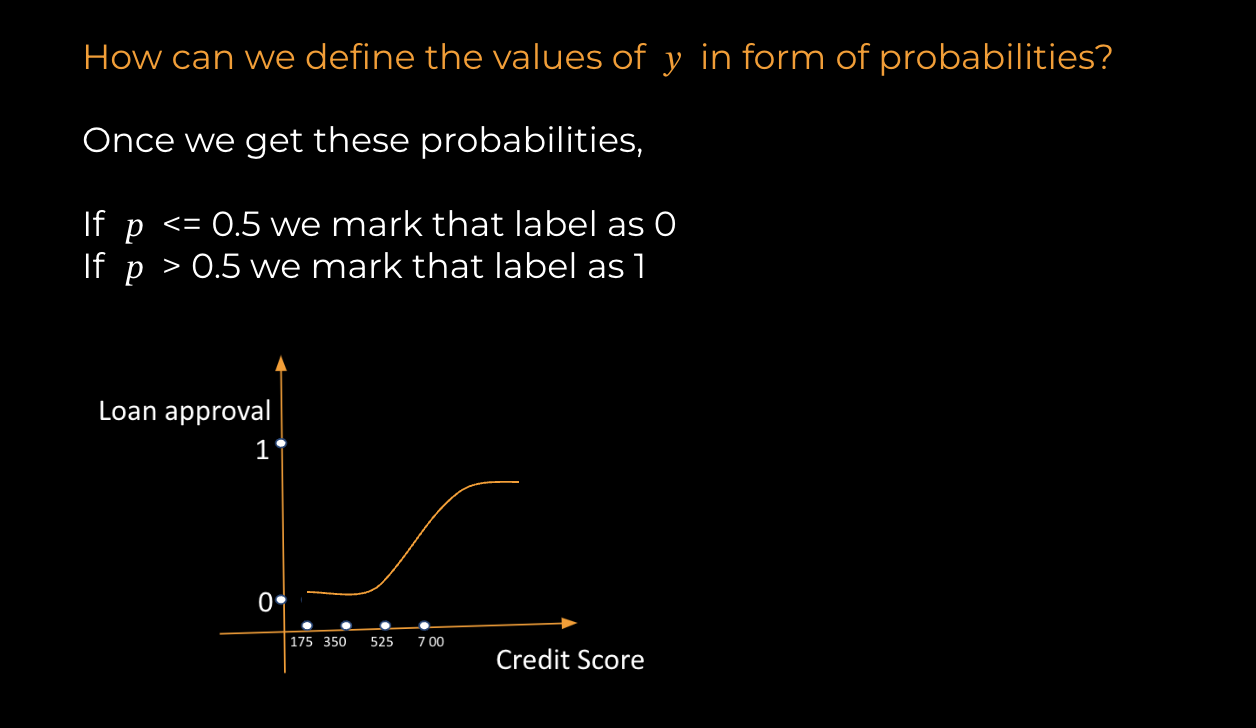

## **Performance - Accuracy Metric**


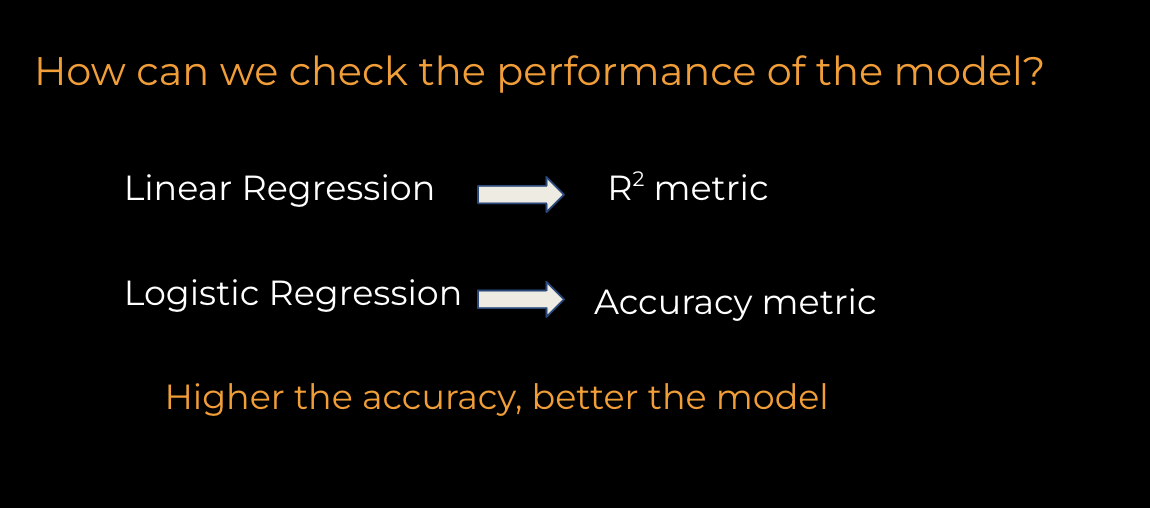

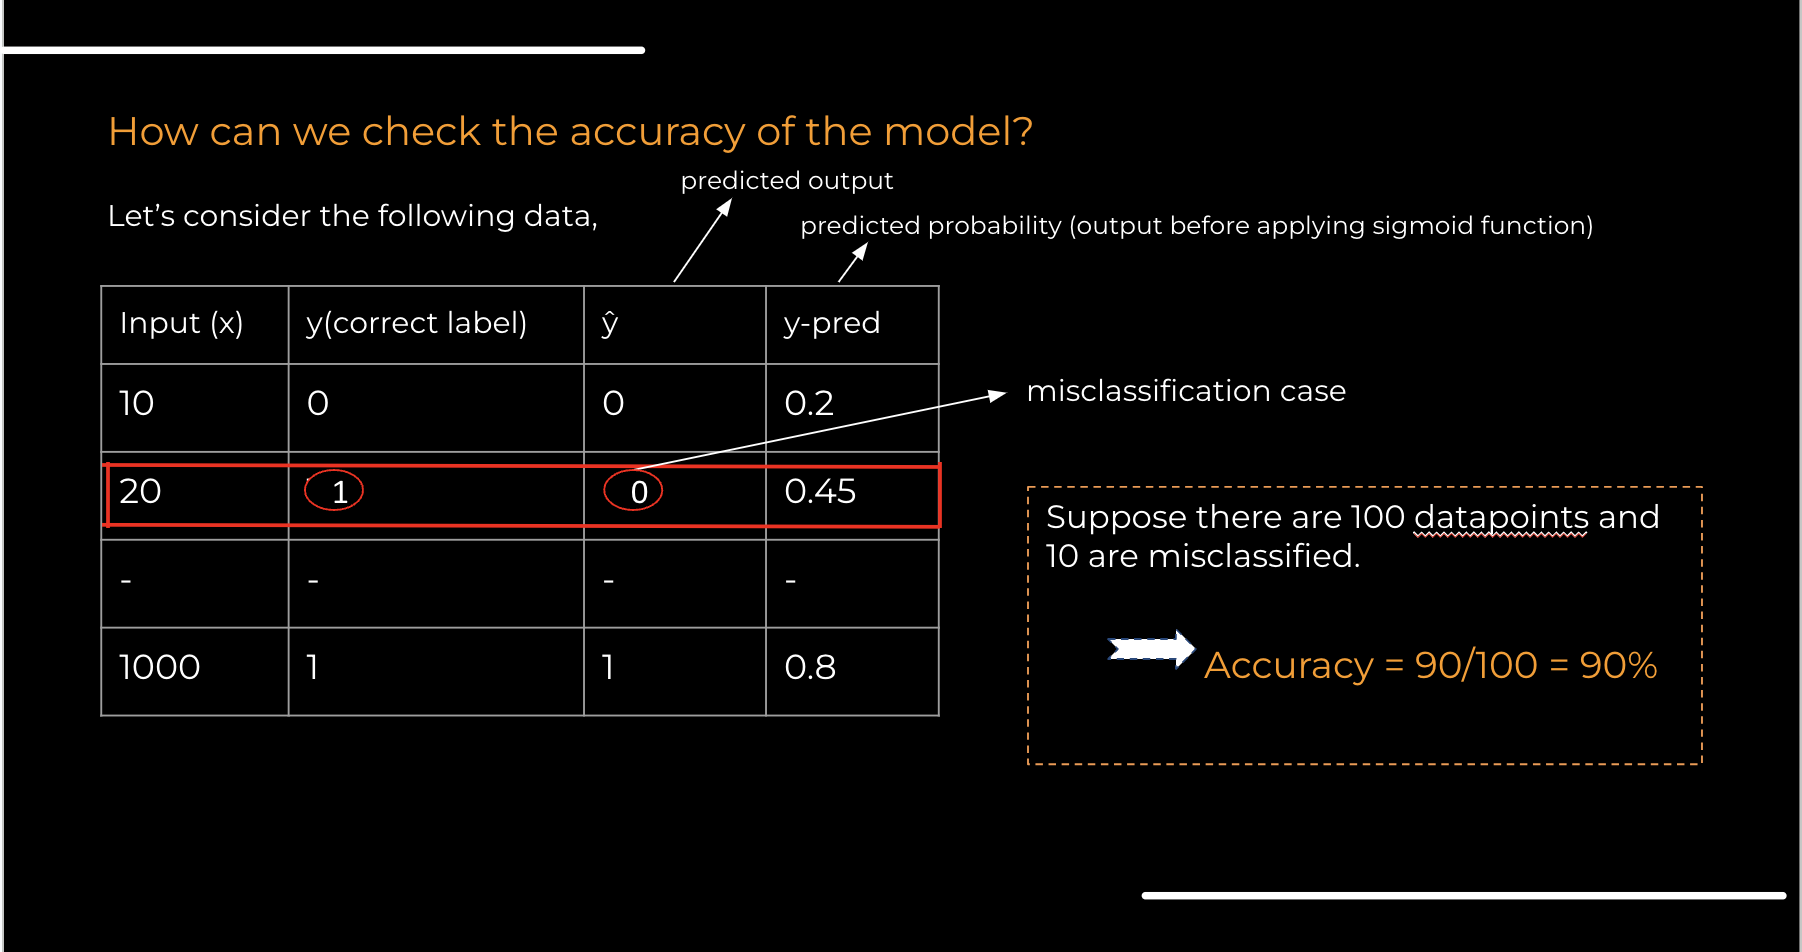

## Why Accuracy is not a good metric always ?

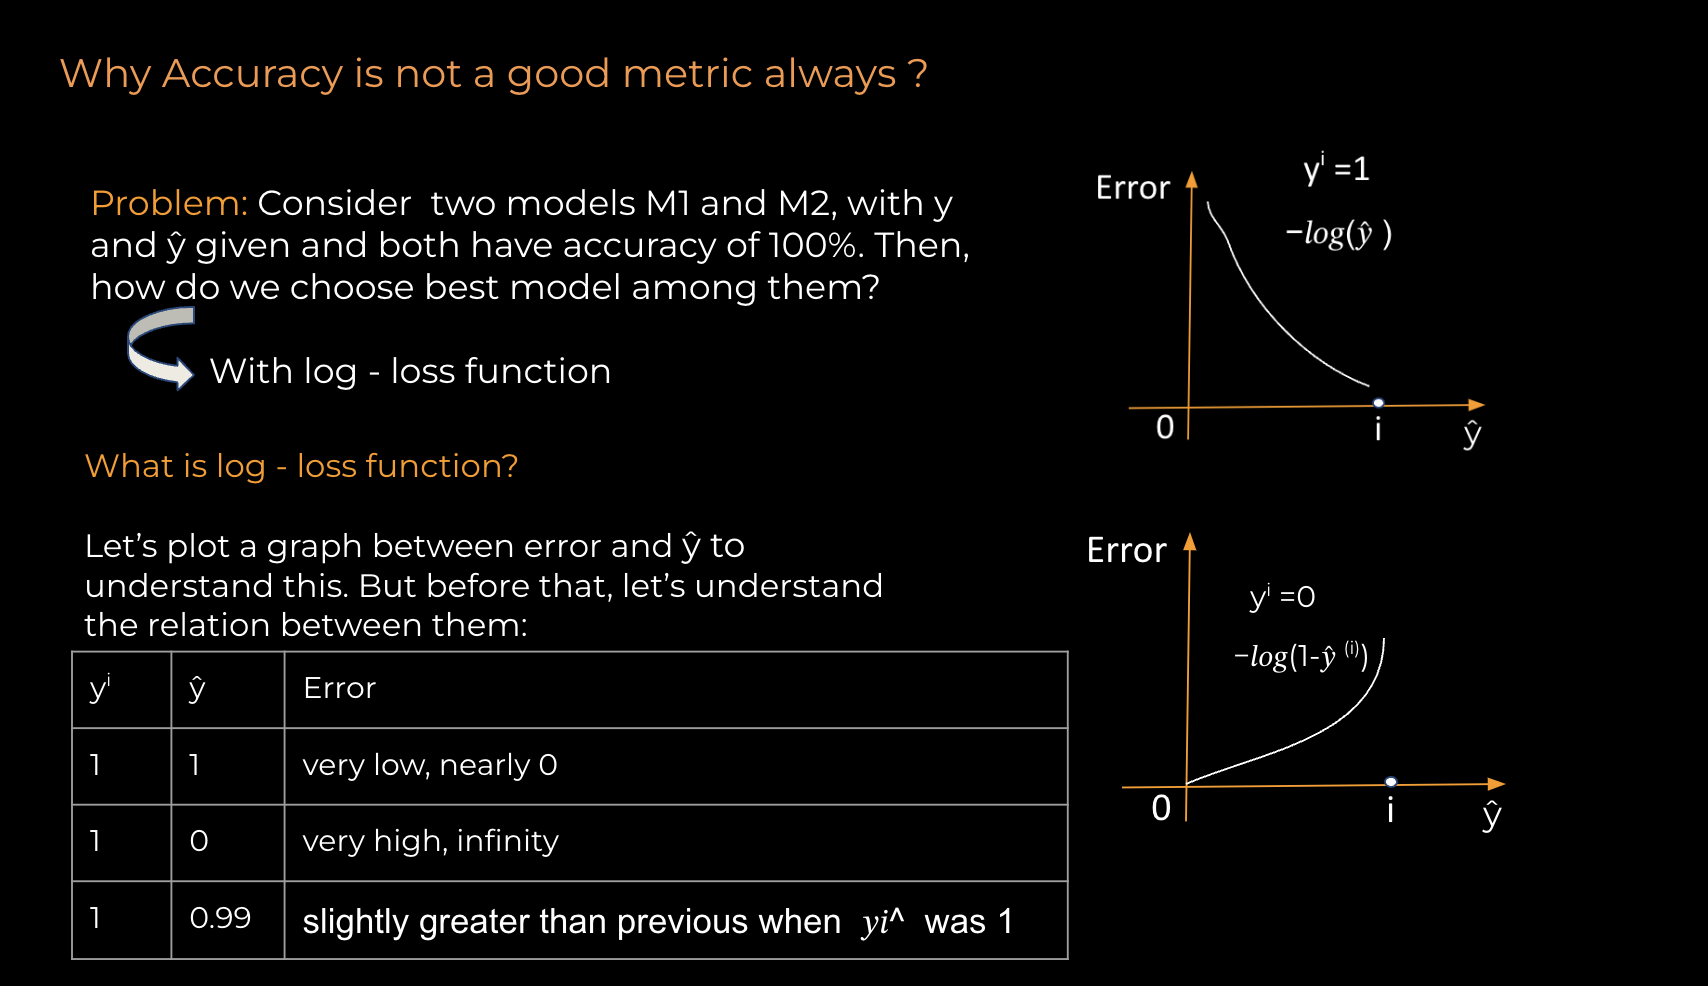

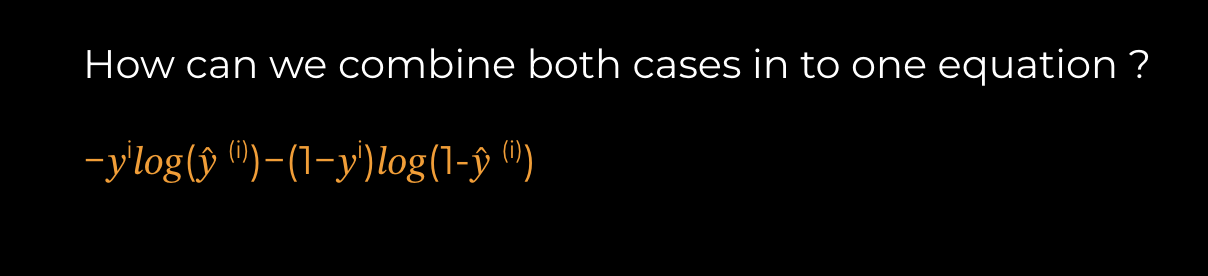

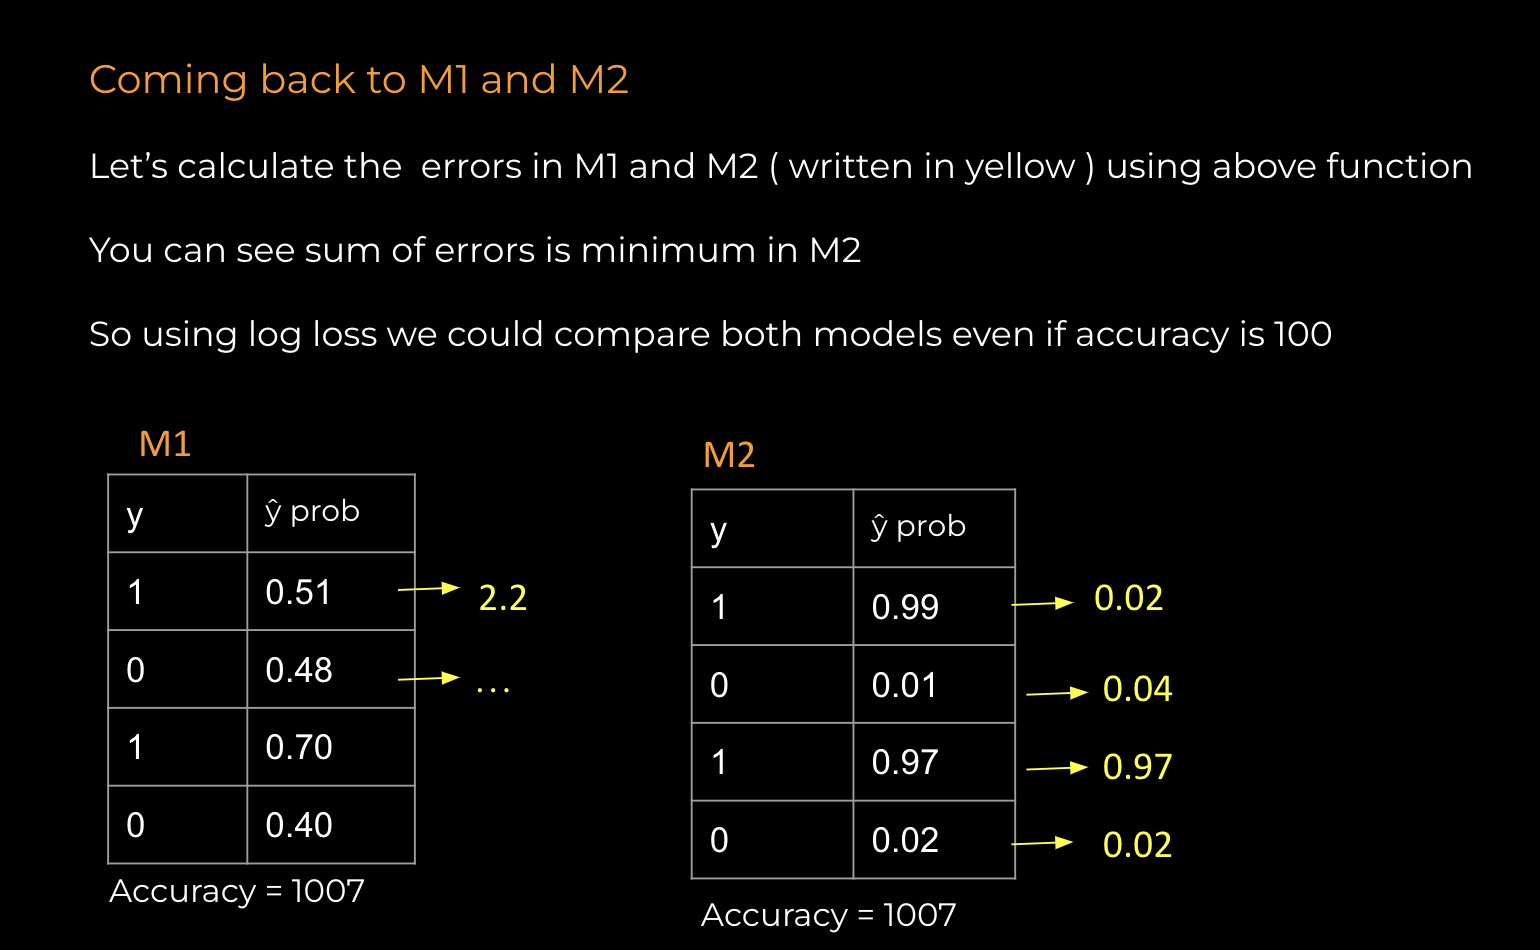

Now let's a take a look at how to implement log-loss function

Case1:
- When $y_i = 1$ and $y_î = 0.9$

In [ ]:
import math

y = 1
yhat=0.9
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.10536051565782628


- Notice how loss is almost 0.1 which is close to 0.


Lets bring $y_î$ even closer to 1

Case2:
- When $y_i = 1$ and $y_î = 0.99$

In [ ]:
y = 1
yhat = 0.99

print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.01005033585350145


- observe how just by incrementing $y_î$ by 0.09, there is a drastic decrease in loss

- Now lets see what happens when  $y_î$ gets closer to 0

Case3:
- When $y_i = 1$ and $y_î = 0.1$

In [ ]:
y=1
yhat=0.1
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

2.3025850929940455


- Notice much high the log-loss is

Lets bring $y_î$ even closer to 0

Case4:
- When $y_i = 1$ and $y_î = 0.01$

In [ ]:
y=1
yhat=0.01
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

4.605170185988091


- observe how just by a small variation in $y_î$, there is a drastic increase in loss


Now lets see what happens for the scenario when :  

Case5:
- When $y_i = 0 $ and $y_î = 0.1$


In [ ]:
y=0
yhat=0.1
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.10536051565782628


- notice how there is a small loss for it which is identical to case 1

- now lets bring $y_î$ closer to 0

Case6:
- When $y_i = 0 $ and $y_î = 0.01$

In [ ]:
y=0
yhat=0.01
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.01005033585350145


- notice how loss decreased similar to case 2


Case6:
- When $y_i = 0 $ and $y_î = 0.9$

In [ ]:
y=0
yhat=0.9
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

2.302585092994046


- As expected now, the loss will be high


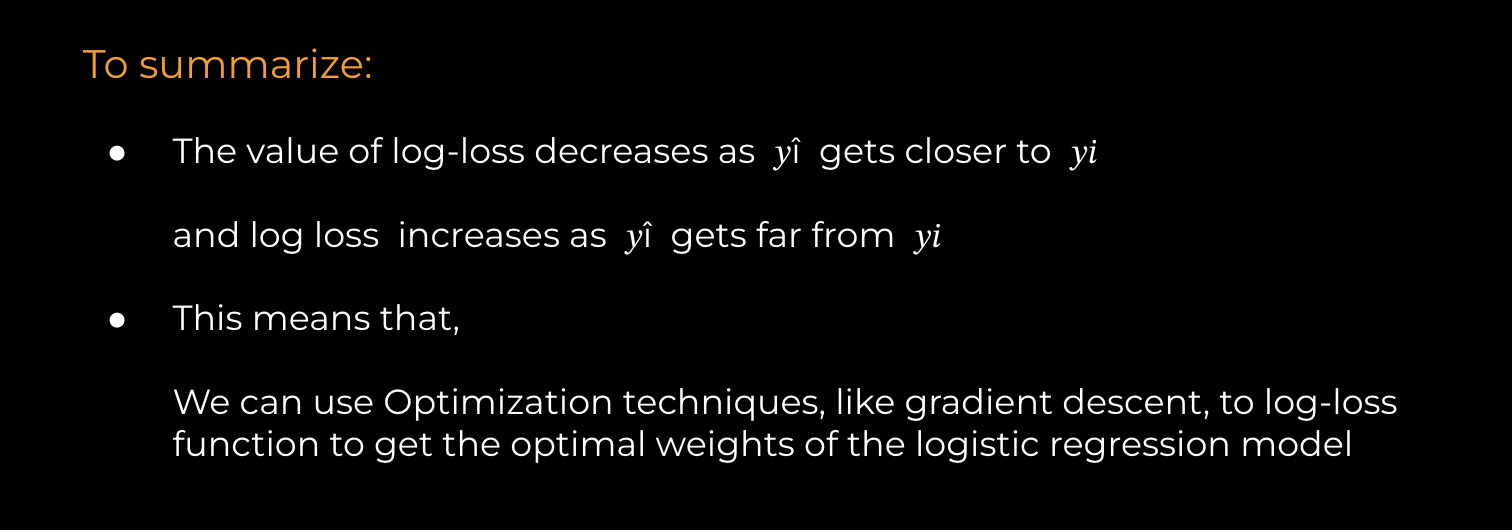

## Optimization

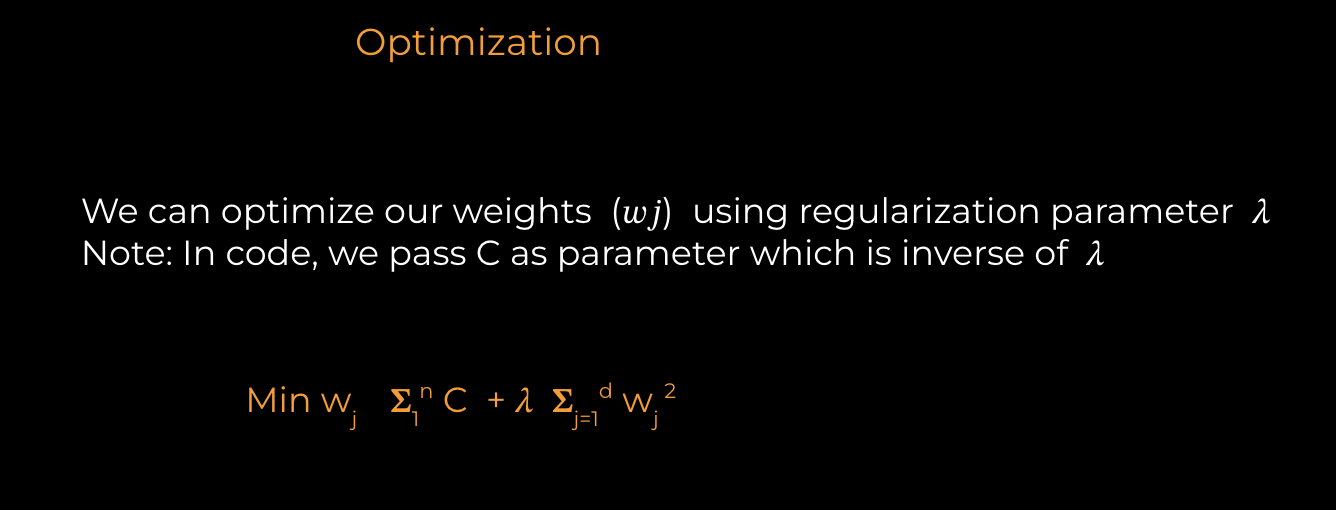

## Scikit Learn Implementation of Logistic Regression

In [ ]:
#Churn prediction in bank.
import numpy as np
import matplotlib.pyplot as plt

Downloading the file

In [ ]:
!gdown 11sOMi2DfxDcbRa64MPe5Tg5iZ45_mohi

Downloading...
From: https://drive.google.com/uc?id=11sOMi2DfxDcbRa64MPe5Tg5iZ45_mohi
To: /content/Bank_customer_retention.csv
100% 494k/494k [00:00<00:00, 101MB/s]


In [ ]:
import pandas as pd
churn = pd.read_csv("Bank_customer_retention.csv")
churn.head()

ID  Age  Credit_Score  Marital_Status_Code  Education_Code  Default  \
0  128   25         265.1                197.4           244.7     10.0   
1  107   26         161.6                195.5           254.4     13.7   
2  137    0         243.4                121.2           162.6     12.2   
3   84    0         299.4                 61.9           196.9      6.6   
4   75    0         166.7                148.3           186.9     10.1   

   Days_Since_Last_Contact  Housing_Loan  Personal_Loan  Last_Contact_Day  \
0                        1             0              1               110   
1                        1             0              1               123   
2                        0             0              0               114   
3                        2             1              0                71   
4                        3             1              0               113   

   ...  Last_Contact_Duration  Contact_Code  Balance  Campaign_Contacts  \
0  ...                     99         16.78       91              11.01   
1  ...                    103         16.62      103              11.45   
2  ...                    110         10.30      104               7.32   
3  ...                     88          5.26       89               8.86   
4  ...                    122         12.61      121               8.41   

   Previous_Contacts  Previous_Campaign_Outcome_Code  Job_Code Area_Code  \
0                  3                            2.70        KS       415   
1                  3                            3.70        OH       415   
2                  5                            3.29        NJ       415   
3                  7                            1.78        OH       408   
4                  3                            2.73        OK       415   

    Number_of_Investment_Products Churn  
0                        382-4657     0  
1                        371-7191     0  
2                        358-1921     0  
3                        375-9999     0  
4                        330-6626     0  

[5 rows x 21 columns]

Lets see how many samples does churn data has

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              5700 non-null   int64  
 1   Age                             5700 non-null   int64  
 2   Credit_Score                    5700 non-null   float64
 3   Marital_Status_Code             5700 non-null   float64
 4   Education_Code                  5700 non-null   float64
 5   Default                         5700 non-null   float64
 6   Days_Since_Last_Contact         5700 non-null   int64  
 7   Housing_Loan                    5700 non-null   int64  
 8   Personal_Loan                   5700 non-null   int64  
 9   Last_Contact_Day                5700 non-null   int64  
 10  Last_Contact_Month_Code         5700 non-null   float64
 11  Last_Contact_Duration           5700 non-null   int64  
 12  Contact_Code                    57

- Notice we have 5700 samples which are quite enough for training the  logisitic Regression model.

Now, lets focus on ```Churn``` column which is our Y  

In [ ]:
churn["Churn"].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

- We see how the data is balanced since we have equal number of samples in both the customers who churned or did not churned

Now lets see how each feature is effective in predicting Churn or Not by performing a univariate EDA

- But since we have already studied EDA, we will do a quick  code walktthrough of it

<Axes: xlabel='Churn', ylabel='Credit_Score'>

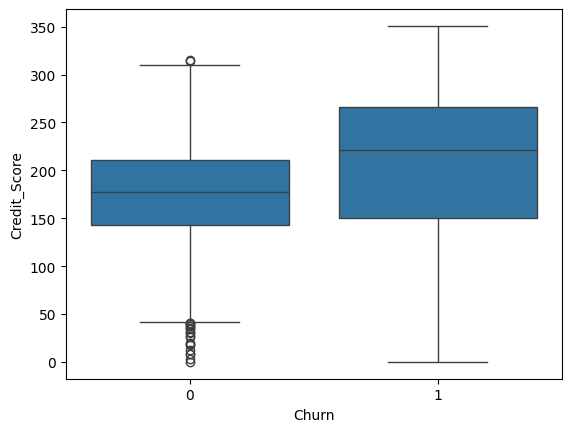

In [ ]:
import seaborn as sns
sns.boxplot(x='Churn', y='Credit_Score', data = churn)

- Notice how we use feature ```Credit_Score``` to check if it is significant or not

#### What can we see from the boxplot ?
- The churned customers have a higher median for  Credit_Score than not churned customers which means:
- Customer whose credit score is higher, tend to churn

this shows, ```Credit_Score``` is an important feature


Now, let's see if there is any other feature which has collinearity with ```Credit_Score```

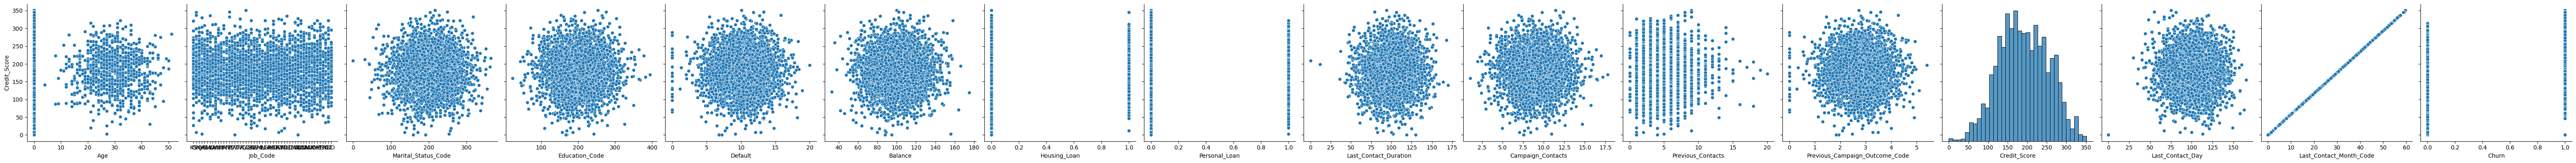

In [ ]:
sns.pairplot(data=churn, y_vars=["Credit_Score"], x_vars=['Age', 'Job_Code' , 'Marital_Status_Code', 'Education_Code',
       'Default', 'Balance', 'Housing_Loan', 'Personal_Loan', 'Last_Contact_Duration',
       'Campaign_Contacts', 'Previous_Contacts', 'Previous_Campaign_Outcome_Code', 'Credit_Score','Last_Contact_Day','Last_Contact_Month_Code',
       'Churn'], height=4, aspect=1)
plt.show()

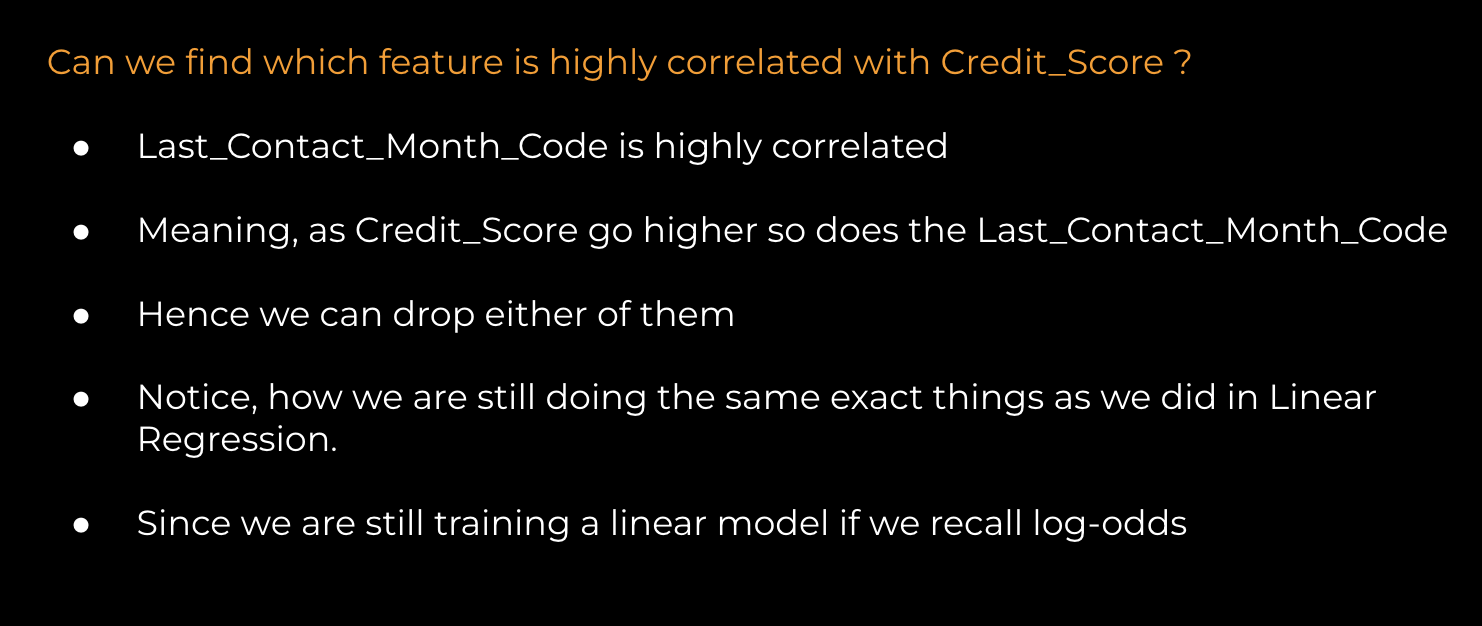

Now lets see another feature ``` ID```

<Axes: xlabel='Churn', ylabel='ID'>

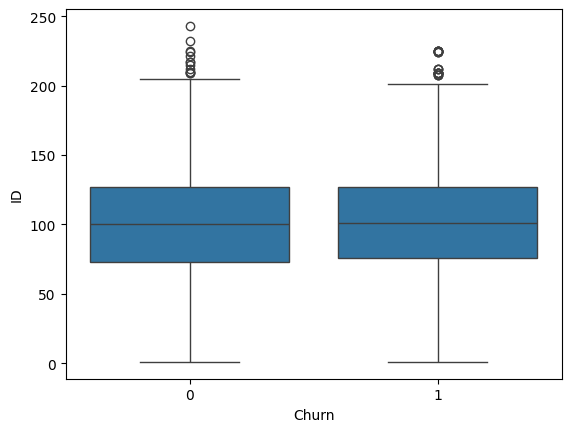

In [ ]:
sns.boxplot(x = 'Churn', y= 'ID', data = churn)

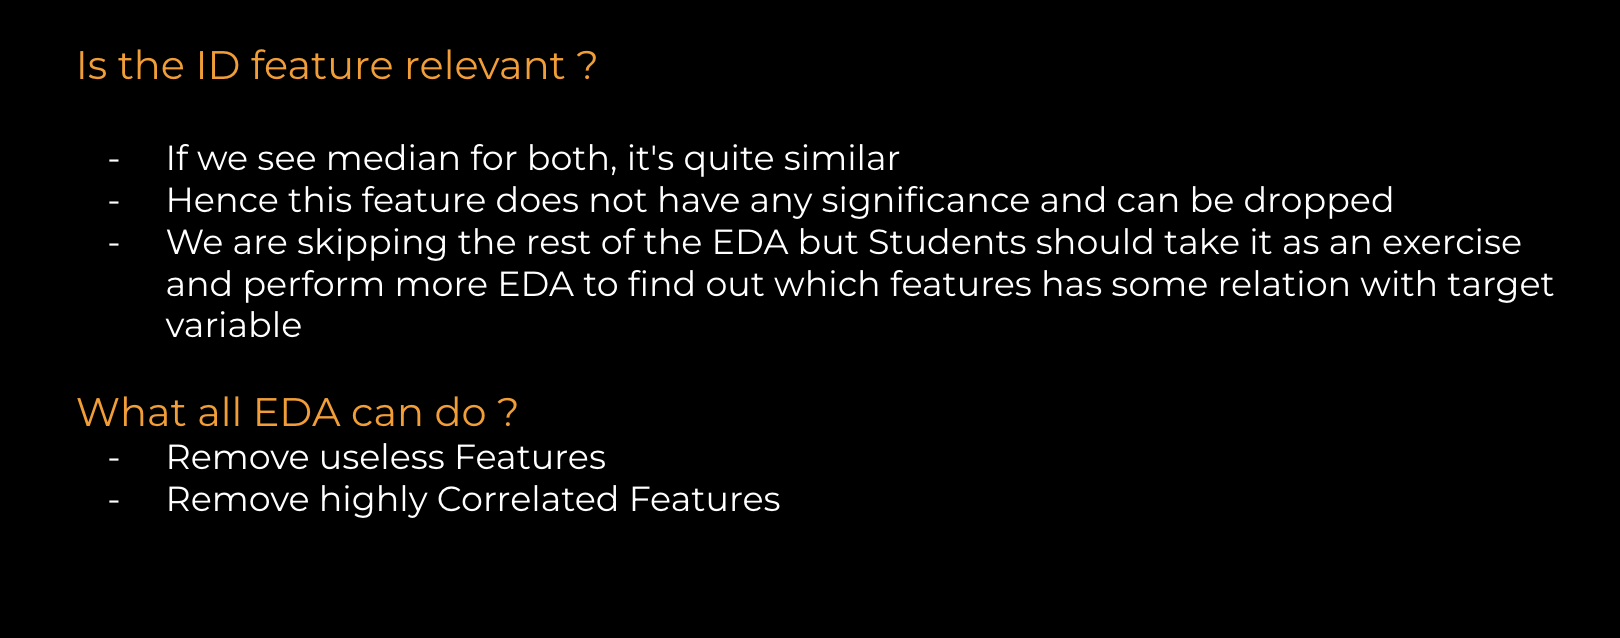

We are now taking a few of the Features which might not be the best ones to choose for this problem statement.

In [ ]:
cols = ['Credit_Score', 'Marital_Status_Code', 'Days_Since_Last_Contact', 'Housing_Loan','Age']
y = churn["Churn"]
X = churn[cols]
X.shape

(5700, 5)

#### Train test Split

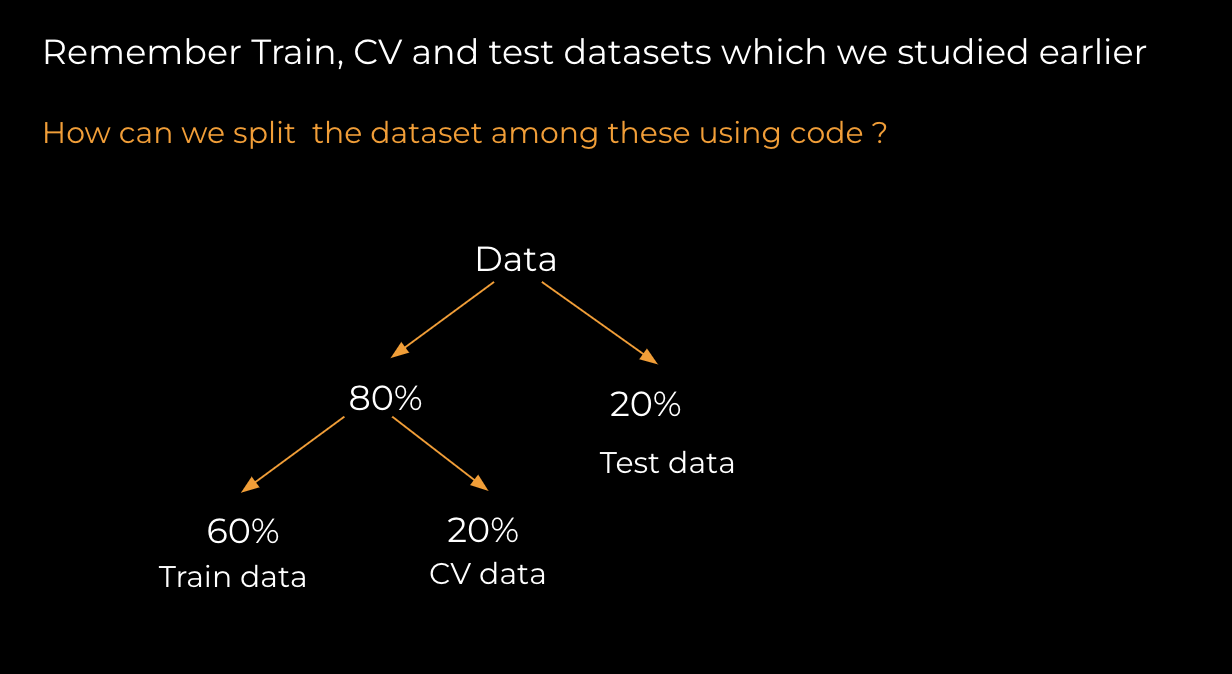

In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(3420, 5)

Now, lets do column standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# print X_train
X_train

array([[-1.3401872 , -2.29116555, -0.52179332,  2.19011647, -0.5352414 ],
       [-0.37273287, -1.19169576, -1.15081453, -0.45659672, -0.5352414 ],
       [ 1.54289097,  0.33984637, -0.52179332, -0.45659672, -0.5352414 ],
       ...,
       [ 0.83417443,  0.52694913, -1.15081453, -0.45659672, -0.5352414 ],
       [-0.58807985, -0.12887496,  1.3652703 , -0.45659672, -0.5352414 ],
       [-0.45469329,  1.42195611,  0.73624909,  2.19011647,  1.68255781]])

> **Instuctor note: Go through this link and explain the parameters from sklearn api**


[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) using scikit Learn

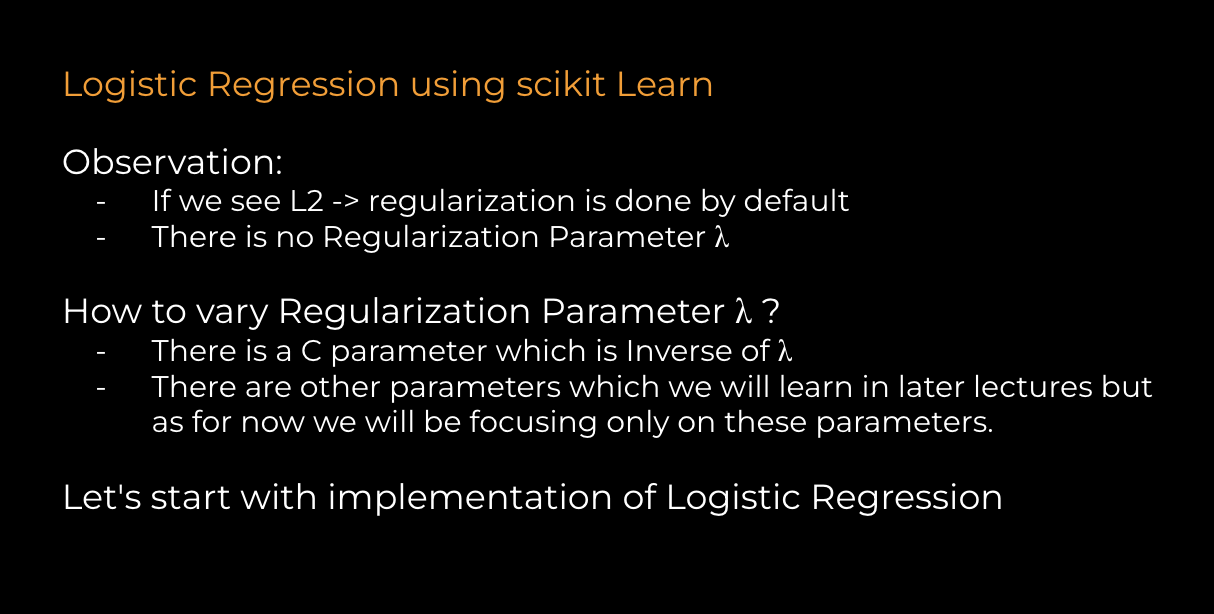


<font color='red'> Instructor Note </font>

When implementing ```ElasticNet``` Regularization,
- Sklearn has 11_ratio hyperparameter which has a range $0 ≤ $ l1_ratio $ ≤ 1$

Setting l1_ratio=0 is
- equivalent to using penalty='l2'

while setting l1_ratio=1 is
- equivalent to using penalty='l1'.

For 0 < l1_ratio <1,
- the penalty is a combination of L1 and L2.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # C = 1, lambda = 1
model.fit(X_train, y_train)

LogisticRegression()

Now, let's see the weights of each feature except $w_0$
- Since $w_0 $ is also called Intercept of the model





In [ ]:
model.coef_

array([[ 0.78670623,  0.31093629,  0.94086792,  0.8692631 , -0.31783734]])

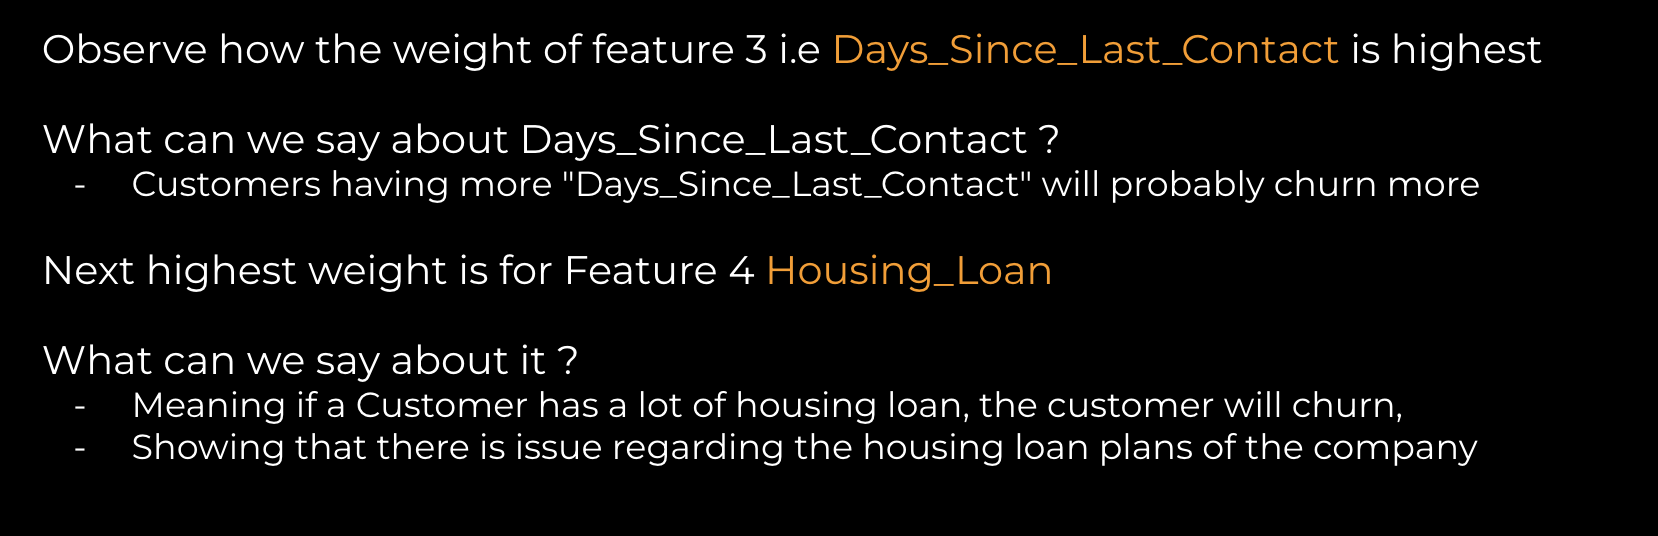

We also have an intercept weight

In [ ]:
model.intercept_

array([0.05338236])

In [ ]:
y_pred=model.predict(X_val)
print(y_pred)

[0 0 1 ... 0 0 0]


we can get the classes for each input with the predict function

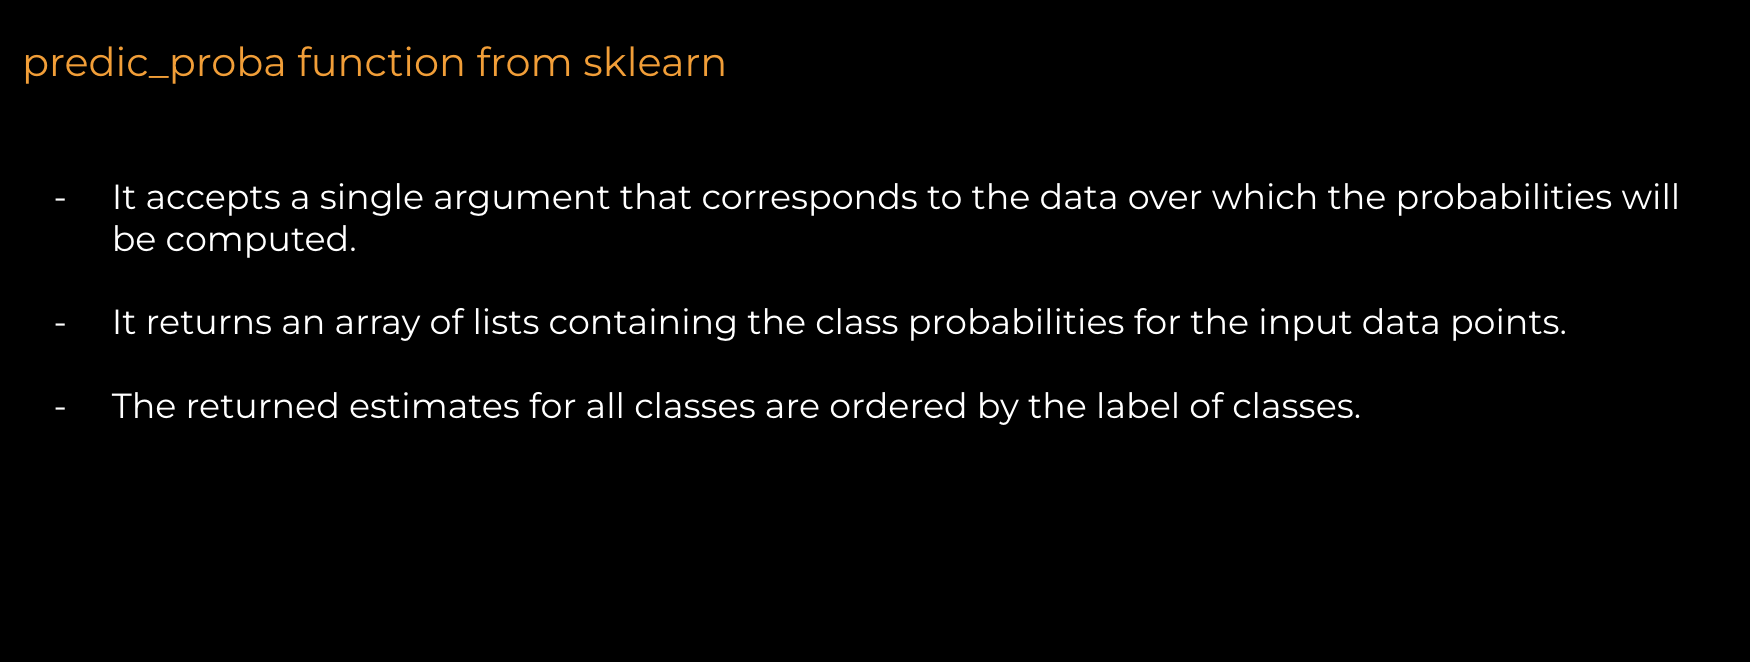

In [ ]:
y_pred_prob=model.predict_proba(X_val)
print(y_pred_prob)

[[0.70979416 0.29020584]
 [0.86810982 0.13189018]
 [0.45614206 0.54385794]
 ...
 [0.95270941 0.04729059]
 [0.60125201 0.39874799]
 [0.81203148 0.18796852]]


What we see here is the probability of each data point being in a class
- also we can see the probabilities add to 1

Checking acuracy score in train and  validation data

In [ ]:
print(f'Train Accuracy:{model.score(X_train,y_train)}, Val Accuracy:{model.score(X_val,y_val) }' )

Train Accuracy:0.7564327485380117, Val Accuracy:0.7578947368421053


**Observe**


How train and validation Accuracy of the logistic Model are quite low,


Hence let's start doing hyper parameter tuning on parameter $C = \frac{1}{\lambda}$  to increase the performance of the model

### sklearn pipeline
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html

https://towardsdatascience.com/building-a-machine-learning-pipeline-3bba20c2352b

Pipeline is a powerful tool to standardise your operations and chain then in a sequence, make unions and finetune parameters.
pipeline class allows sticking multiple processes into a single scikit-learn estimator.

pipeline class has fit, predict and score method just like any other estimator (ex. LinearRegression).

In [ ]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 12000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = scaled_lr.score(X_train, y_train)
  val_score = scaled_lr.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)

The code is similar to the code explained in Linear Regression


- First we initialize the values for $λ$
- then for each value of $λ$
    - Then create a pipeline for standarization scaling and Logistic Regression model
    - Then fit the train data to the model
    - And get the scores of the train and validation data set
    

NOTE: the default scoring metric is Accuracy





In [ ]:
len(val_scores)

120

Now, let's plot the graph and pick the Regularization Parameter $λ$ which gives the best validation score

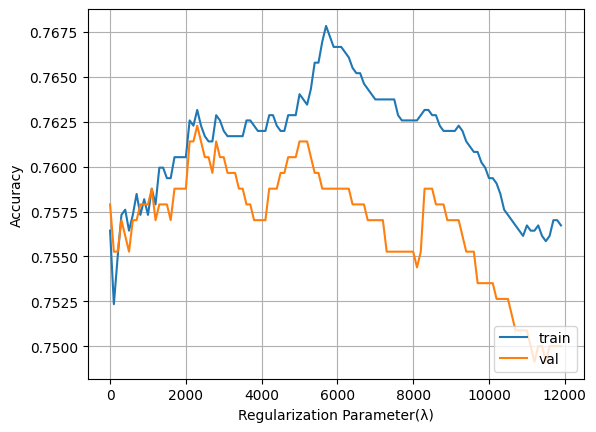

In [ ]:
plt.figure()
plt.plot(list(np.arange(0.01, 12000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 12000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()



- We see how Validation increases to a peak and then decreases



- Notice as Regularization is increasing, the Accuracy is keep on decreasing since model is moving towards Underfit





<font color='red'> Instructor Note </font>

Increase the  Regularization further to 50000
- by replacing the 12000 hyperparameter range to 50000
- and run the simulation again


#### What can we see from the increased value of Regularization Parameter?

- We see how the model starts underfitting and performing poorly on the train and validation data

- Now we pick that $λ$ we are getting the maximum validation score

In [ ]:
np.argmax(val_scores)

23

In [ ]:
val_scores[23]

0.762280701754386

- We observe that validation score is maximum of 76.2% when index = 23, thus our $λ$ best becomes:

In [ ]:
l_best = 0.01 * 23 * 100

- We do this since we are stepping 100 in each iteration

Lets train model with best λ

In [ ]:
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best))
scaled_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.043478260869565216))])

Now test this best model on our test data

In [ ]:
test_score = scaled_lr.score(X_test,y_test)
print(test_score)

0.7657894736842106


NOTE: The scaler in the pipepline performs scaling first and then the logistic Regression,
- the scaler uses training data mean and standard deviation when model is in training
- And continues using it for Validation and Test data since we are not using ```.fit()``` function instead just a ```.score()``` function

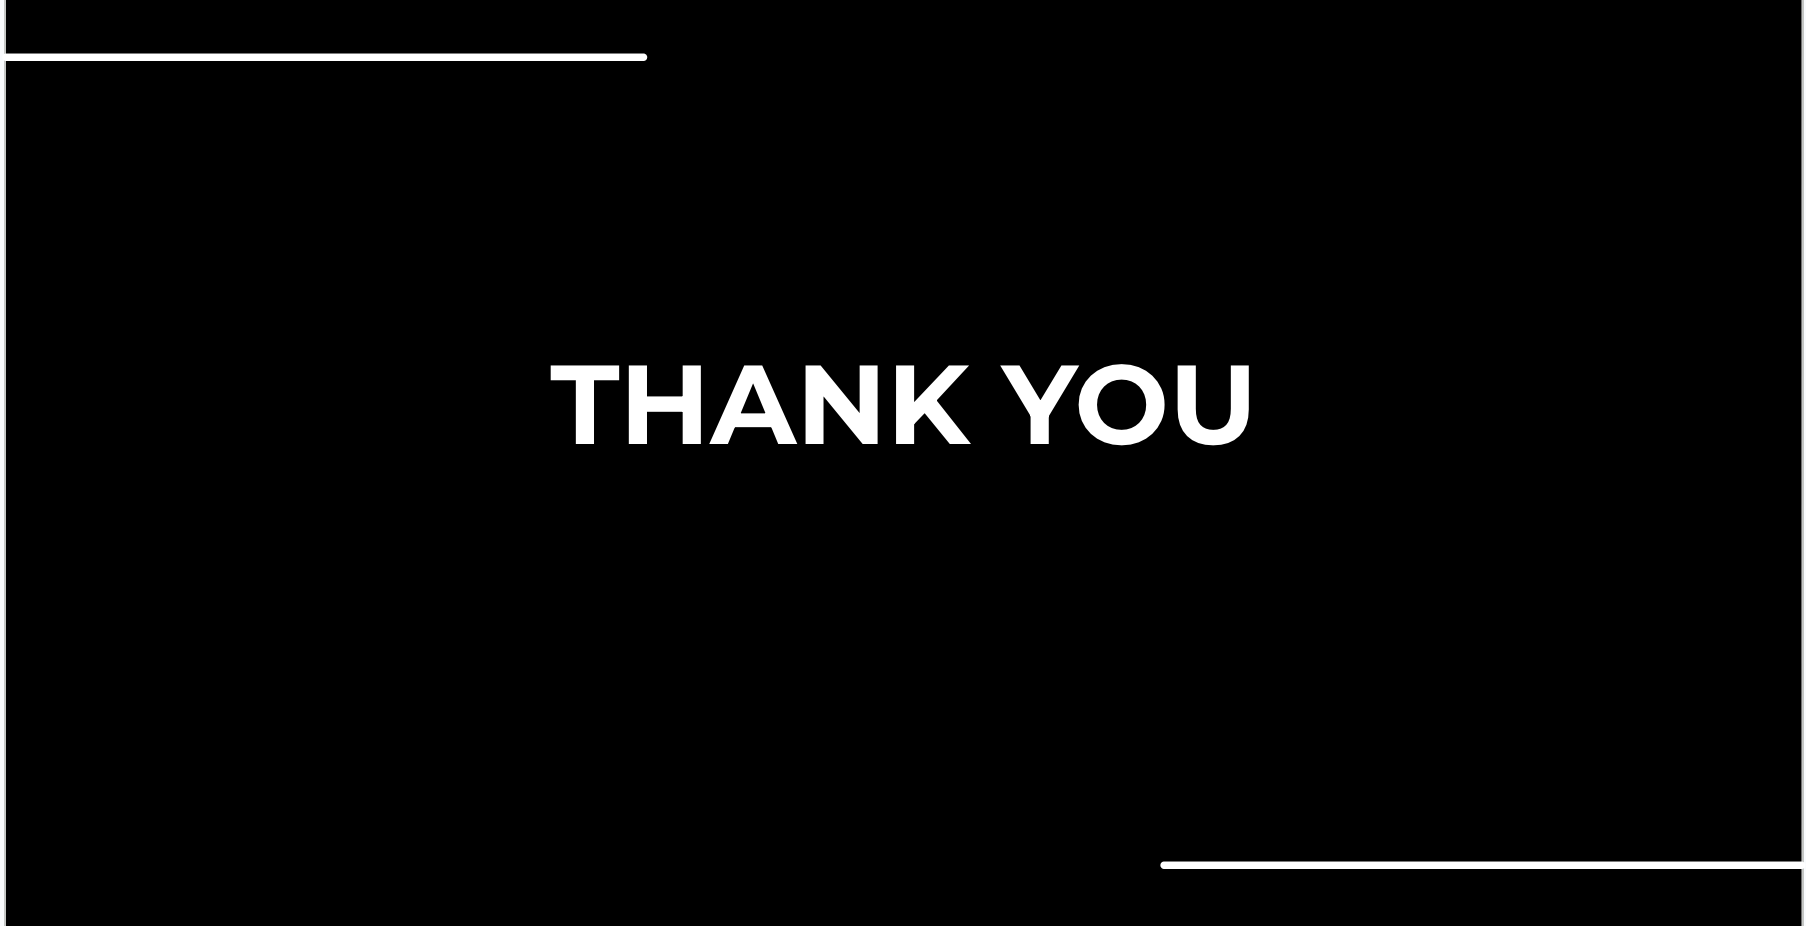